In [1]:
#import Computation Libraries
import numpy as np
import pandas as pd

#import Visualization Libraries
from sklearn import preprocessing, model_selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%config InlineBackend.figure_format = 'retina'

In [2]:
# Read Dataset dengan 100 rows teratas
data = pd.read_csv('C:/Users/Cango56/Documents/T.Informatika/Semester 8/Tugas Akhir/Dataset MPTI-TA(1).csv')
data

,No,Customer,Type,S/N,STATUS,Date Call,Time Call,Time In,Time Out,Respon Time(Menit),Down Time(Menit),PROBLEM,PERBAIKAN
0,1,Bank Victoria Cab. Mangga Besar,M-2535dn,LZP5X03812,GSP,6/8/2020,12:15 PM,12:49 PM,1:40 PM,34,85,Mesin noise,GSP Heatroll dan Bushing
1,2,Kementerian Pekerja Umum Bag. Umum,TA-3501i,LUN3Z00240,UMC,6/3/2020,9:20 AM,9:58 AM,10:51 AM,38,91,Hasil Bentol dan Garis,Clean MC dan Clean Sit Glass
2,3,Bank Panin Cab. Sudirman Bag. Teller,M-2535dn,LZP6Z08461,UMC,6/14/2020,12:02 PM,12:42 PM,1:49 PM,40,107,Paper Jam,Setting Cassete Folio
3,4,Metro 55,TA-1800,LT14Y16405,UMC,6/5/2020,8:30 AM,9:06 AM,10:05 AM,36,95,Hasil Bergaris,"Kuras Drum, Clean Cleaning Blade"
4,5,Bank OCBC NISP Cab. Tendean,M-2535dn,LZP6405812,UMC,6/3/2020,11:30 AM,12:47 PM,1:38 PM,77,128,Paper Jam DP + Cassete,"Clean Pulley DP, Clean Pulley Cassete"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,1616,Halik Selindo Alpha,TA-180,QLZ1306551,UMC + MM,6/25/2021,12:30 PM,1:40 PM,2:20 PM,70,110,Hasil bergaris,"Maintenance, Clean shit glass"
1616,1617,Halik Selindo Alpha,TA-180,QLZ1Z09159,UMC + MM,6/28/2021,3:00 PM,4:10 PM,4:50 PM,70,110,Hasil bergaris,"Maintenance, Clean shit glass"
1617,1618,Halik Selindo Alpha,TA-180,QLZ0103834,UMC + MM,6/28/2021,10:00 AM,10:50 AM,11:30 AM,50,90,Hasil bergaris,"Maintenance, Clean shit glass"
1618,1619,Halik Selindo Alpha,M-2540dn,LZP7610230,UMC,6/29/2021,11:00 AM,11:50 AM,12:30 PM,50,90,Hasil kotor,"Kuras drum, Clean CL, Order drum+Cleaning blade"


In [3]:
## Melihat Informasi data dari dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  1620 non-null   int64 
 1   Customer            1620 non-null   object
 2   Type                1620 non-null   object
 3   S/N                 1619 non-null   object
 4   STATUS              1620 non-null   object
 5   Date Call           1620 non-null   object
 6   Time Call           1620 non-null   object
 7   Time In             1620 non-null   object
 8   Time Out            1620 non-null   object
 9   Respon Time(Menit)  1620 non-null   int64 
 10  Down Time(Menit)    1620 non-null   int64 
 11  PROBLEM             1620 non-null   object
 12  PERBAIKAN           1620 non-null   object
dtypes: int64(3), object(10)
memory usage: 164.7+ KB


In [4]:
## Data Selection terhadap beberapa column
data = data[["Customer", "Type", "S/N", "STATUS", "PROBLEM", "PERBAIKAN"]]
data

,Customer,Type,S/N,STATUS,PROBLEM,PERBAIKAN
0,Bank Victoria Cab. Mangga Besar,M-2535dn,LZP5X03812,GSP,Mesin noise,GSP Heatroll dan Bushing
1,Kementerian Pekerja Umum Bag. Umum,TA-3501i,LUN3Z00240,UMC,Hasil Bentol dan Garis,Clean MC dan Clean Sit Glass
2,Bank Panin Cab. Sudirman Bag. Teller,M-2535dn,LZP6Z08461,UMC,Paper Jam,Setting Cassete Folio
3,Metro 55,TA-1800,LT14Y16405,UMC,Hasil Bergaris,"Kuras Drum, Clean Cleaning Blade"
4,Bank OCBC NISP Cab. Tendean,M-2535dn,LZP6405812,UMC,Paper Jam DP + Cassete,"Clean Pulley DP, Clean Pulley Cassete"
...,...,...,...,...,...,...
1615,Halik Selindo Alpha,TA-180,QLZ1306551,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass"
1616,Halik Selindo Alpha,TA-180,QLZ1Z09159,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass"
1617,Halik Selindo Alpha,TA-180,QLZ0103834,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass"
1618,Halik Selindo Alpha,M-2540dn,LZP7610230,UMC,Hasil kotor,"Kuras drum, Clean CL, Order drum+Cleaning blade"


In [5]:
## Menghitung total baris dari kolom "Problem"
data["PROBLEM"].value_counts()

Tidak Ada                          220
Paper jam                           95
Hasil kotor                         44
Hasil bergaris                      31
Hasil Bergaris                      24
                                  ... 
Slide glass                          1
Hasil Bergaris kuning                1
C2550                                1
Hasil bercak kuning dan merah        1
Fotocopy copy F4 dan paper jam       1
Name: PROBLEM, Length: 758, dtype: int64

In [6]:
## Data Preprocessing
import re
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+' 
pat2 = r'https?://[^ ]+' 
combined_pat = r'|'.join((pat1, pat2)) 
www_pat = r'www.[^ ]+' 

#set_stopword yang di deskripsikan sendiri
stopword_user = set(pd.read_csv('C:/Users/Cango56/Documents/T.Informatika/Semester 8/Tugas Akhir/Dataset MPTI-TA(1).csv', sep='\n', header=0))

In [7]:
def proses_teks(teks):
    soup = BeautifulSoup(teks, 'lxml')
    souped = soup.get_text()
    try:
        teks = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        teks = souped
    teks_bersih= re.sub("[^a-zA-Z0-9]", " ",(re.sub(www_pat, '', re.sub(combined_pat, '', teks)).lower()))
    teks_bersih= ' '.join([word for word in teks_bersih.split() if word not in stopword_user])
    return (" ".join([x for x in tok.tokenize(teks_bersih) if len(x) > 1])).strip()

In [8]:
x=[]
for teks in data.PROBLEM:
    x.append(proses_teks(teks))

In [9]:
clean_text=pd.DataFrame({'Clean_PROBLEM':x})

In [10]:
data=pd.concat([data,clean_text],axis=1)
data

,Customer,Type,S/N,STATUS,PROBLEM,PERBAIKAN,Clean_PROBLEM
0,Bank Victoria Cab. Mangga Besar,M-2535dn,LZP5X03812,GSP,Mesin noise,GSP Heatroll dan Bushing,mesin noise
1,Kementerian Pekerja Umum Bag. Umum,TA-3501i,LUN3Z00240,UMC,Hasil Bentol dan Garis,Clean MC dan Clean Sit Glass,hasil bentol dan garis
2,Bank Panin Cab. Sudirman Bag. Teller,M-2535dn,LZP6Z08461,UMC,Paper Jam,Setting Cassete Folio,paper jam
3,Metro 55,TA-1800,LT14Y16405,UMC,Hasil Bergaris,"Kuras Drum, Clean Cleaning Blade",hasil bergaris
4,Bank OCBC NISP Cab. Tendean,M-2535dn,LZP6405812,UMC,Paper Jam DP + Cassete,"Clean Pulley DP, Clean Pulley Cassete",paper jam dp cassete
...,...,...,...,...,...,...,...
1615,Halik Selindo Alpha,TA-180,QLZ1306551,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris
1616,Halik Selindo Alpha,TA-180,QLZ1Z09159,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris
1617,Halik Selindo Alpha,TA-180,QLZ0103834,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris
1618,Halik Selindo Alpha,M-2540dn,LZP7610230,UMC,Hasil kotor,"Kuras drum, Clean CL, Order drum+Cleaning blade",hasil kotor


In [11]:
x=[]
for teks in data.PERBAIKAN:
    x.append(proses_teks(teks))

In [12]:
clean_text=pd.DataFrame({'Clean_PERBAIKAN':x})

In [13]:
data=pd.concat([data,clean_text],axis=1)
data

,Customer,Type,S/N,STATUS,PROBLEM,PERBAIKAN,Clean_PROBLEM,Clean_PERBAIKAN
0,Bank Victoria Cab. Mangga Besar,M-2535dn,LZP5X03812,GSP,Mesin noise,GSP Heatroll dan Bushing,mesin noise,gsp heatroll dan bushing
1,Kementerian Pekerja Umum Bag. Umum,TA-3501i,LUN3Z00240,UMC,Hasil Bentol dan Garis,Clean MC dan Clean Sit Glass,hasil bentol dan garis,clean mc dan clean sit glass
2,Bank Panin Cab. Sudirman Bag. Teller,M-2535dn,LZP6Z08461,UMC,Paper Jam,Setting Cassete Folio,paper jam,setting cassete folio
3,Metro 55,TA-1800,LT14Y16405,UMC,Hasil Bergaris,"Kuras Drum, Clean Cleaning Blade",hasil bergaris,kuras drum clean cleaning blade
4,Bank OCBC NISP Cab. Tendean,M-2535dn,LZP6405812,UMC,Paper Jam DP + Cassete,"Clean Pulley DP, Clean Pulley Cassete",paper jam dp cassete,clean pulley dp clean pulley cassete
...,...,...,...,...,...,...,...,...
1615,Halik Selindo Alpha,TA-180,QLZ1306551,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass
1616,Halik Selindo Alpha,TA-180,QLZ1Z09159,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass
1617,Halik Selindo Alpha,TA-180,QLZ0103834,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass
1618,Halik Selindo Alpha,M-2540dn,LZP7610230,UMC,Hasil kotor,"Kuras drum, Clean CL, Order drum+Cleaning blade",hasil kotor,kuras drum clean cl order drum cleaning blade


In [14]:
## Menghitung total baris dari kolom "Clean Problem" setelah di preprocessing
data["Clean_PROBLEM"].value_counts()

tidak ada                             220
paper jam                             130
hasil bergaris                         89
hasil kotor                            79
tidak bisa scan                        25
                                     ... 
becak kuning                            1
hasil fotocopy dan print pudar          1
jam 0501 toner empty                    1
hinge lemah                             1
tidak bisa print hasil print kotor      1
Name: Clean_PROBLEM, Length: 675, dtype: int64

In [15]:
## Merubah isi data teks menjadi numerik menggunakan kondisi if elif pada kolom "Clean_Problem" dan membuat kolom baru yaitu "Kategori_Problem"
label = []
for index, row in data.iterrows():
    if row["Clean_PROBLEM"] == 'paper jam':
        label.append(1)
    elif row["Clean_PROBLEM"] == 'hasil bergaris':
        label.append(2)
    elif row["Clean_PROBLEM"] == 'hasil kotor':
        label.append(3)
    elif row["Clean_PROBLEM"] == 'tidak bisa scan':
        label.append(4)
    elif row["Clean_PROBLEM"] == 'mesin noise':
        label.append(5)
    elif row["Clean_PROBLEM"] == 'hasil bercak':
        label.append(6)
    elif row["Clean_PROBLEM"] == 'hasil background':
        label.append(7)
    elif row["Clean_PROBLEM"] == 'error c7990':
        label.append(8)
    else:
        label.append(0)
        
data["Kategori_Problem"] = label
data

,Customer,Type,S/N,STATUS,PROBLEM,PERBAIKAN,Clean_PROBLEM,Clean_PERBAIKAN,Kategori_Problem
0,Bank Victoria Cab. Mangga Besar,M-2535dn,LZP5X03812,GSP,Mesin noise,GSP Heatroll dan Bushing,mesin noise,gsp heatroll dan bushing,5
1,Kementerian Pekerja Umum Bag. Umum,TA-3501i,LUN3Z00240,UMC,Hasil Bentol dan Garis,Clean MC dan Clean Sit Glass,hasil bentol dan garis,clean mc dan clean sit glass,0
2,Bank Panin Cab. Sudirman Bag. Teller,M-2535dn,LZP6Z08461,UMC,Paper Jam,Setting Cassete Folio,paper jam,setting cassete folio,1
3,Metro 55,TA-1800,LT14Y16405,UMC,Hasil Bergaris,"Kuras Drum, Clean Cleaning Blade",hasil bergaris,kuras drum clean cleaning blade,2
4,Bank OCBC NISP Cab. Tendean,M-2535dn,LZP6405812,UMC,Paper Jam DP + Cassete,"Clean Pulley DP, Clean Pulley Cassete",paper jam dp cassete,clean pulley dp clean pulley cassete,0
...,...,...,...,...,...,...,...,...,...
1615,Halik Selindo Alpha,TA-180,QLZ1306551,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2
1616,Halik Selindo Alpha,TA-180,QLZ1Z09159,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2
1617,Halik Selindo Alpha,TA-180,QLZ0103834,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2
1618,Halik Selindo Alpha,M-2540dn,LZP7610230,UMC,Hasil kotor,"Kuras drum, Clean CL, Order drum+Cleaning blade",hasil kotor,kuras drum clean cl order drum cleaning blade,3


In [16]:
## Menghitung total baris dari kolom "Kategori Problem" setelah di rubah menjadi numerik
data["Kategori_Problem"].value_counts()

0    1227
1     130
2      89
3      79
5      25
4      25
6      18
8      14
7      13
Name: Kategori_Problem, dtype: int64

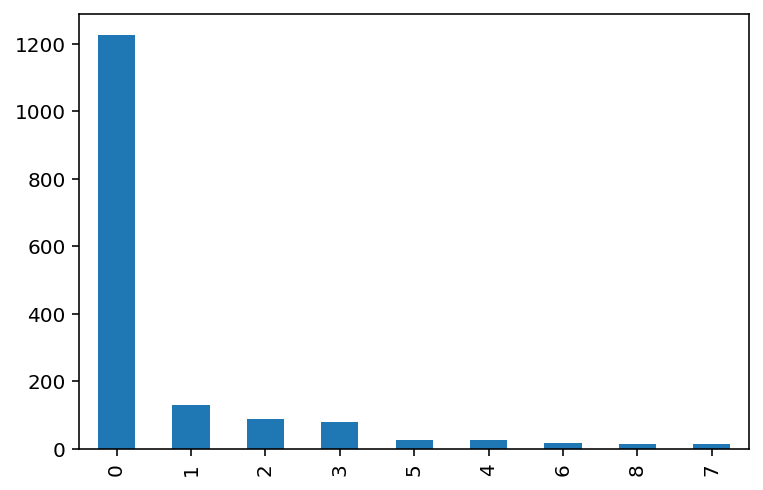

In [17]:
## Melihat grafik bar pada kategori problem
data['Kategori_Problem'].value_counts().plot(kind= 'bar')  

In [18]:
## Menghitung total baris dari kolom "Type"
data["Type"].value_counts()

M-2540dn       192
TA-2551Ci      144
TA-3010i       135
M-2535DN       131
FS-6525MFP     129
              ... 
TA-3550Ci        1
FS-C850MFP       1
TA-3253Ci        1
FS-1135DN        1
FS-C8020MFP      1
Name: Type, Length: 71, dtype: int64

In [19]:
## Merubah isi data teks menjadi numerik menggunakan kondisi if elif pada kolom "Type" dan membuat kolom baru yaitu "Kategori_Type"
label = []
for index, row in data.iterrows():
    if row["Type"] == 'M-2540dn':
        label.append(1)
    elif row["Type"] == 'M-2535dn':
        label.append(2)
    elif row["Type"] == 'TA-3010i':
        label.append(3)
    elif row["Type"] == 'TA-2551Ci':
        label.append(4)
    elif row["Type"] == 'TA-2552Ci':
        label.append(5)
    elif row["Type"] == 'FS-6525MFP':
        label.append(6)
    elif row["Type"] == 'TA-1800':
        label.append(7)
    elif row["Type"] == 'TA-180':
        label.append(8)
    elif row["Type"] == 'FS-6030MFP':
        label.append(9)
    else:
        label.append(0)
        
data["Kategori_Type"] = label
data

,Customer,Type,S/N,STATUS,PROBLEM,PERBAIKAN,Clean_PROBLEM,Clean_PERBAIKAN,Kategori_Problem,Kategori_Type
0,Bank Victoria Cab. Mangga Besar,M-2535dn,LZP5X03812,GSP,Mesin noise,GSP Heatroll dan Bushing,mesin noise,gsp heatroll dan bushing,5,2
1,Kementerian Pekerja Umum Bag. Umum,TA-3501i,LUN3Z00240,UMC,Hasil Bentol dan Garis,Clean MC dan Clean Sit Glass,hasil bentol dan garis,clean mc dan clean sit glass,0,0
2,Bank Panin Cab. Sudirman Bag. Teller,M-2535dn,LZP6Z08461,UMC,Paper Jam,Setting Cassete Folio,paper jam,setting cassete folio,1,2
3,Metro 55,TA-1800,LT14Y16405,UMC,Hasil Bergaris,"Kuras Drum, Clean Cleaning Blade",hasil bergaris,kuras drum clean cleaning blade,2,7
4,Bank OCBC NISP Cab. Tendean,M-2535dn,LZP6405812,UMC,Paper Jam DP + Cassete,"Clean Pulley DP, Clean Pulley Cassete",paper jam dp cassete,clean pulley dp clean pulley cassete,0,2
...,...,...,...,...,...,...,...,...,...,...
1615,Halik Selindo Alpha,TA-180,QLZ1306551,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2,8
1616,Halik Selindo Alpha,TA-180,QLZ1Z09159,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2,8
1617,Halik Selindo Alpha,TA-180,QLZ0103834,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2,8
1618,Halik Selindo Alpha,M-2540dn,LZP7610230,UMC,Hasil kotor,"Kuras drum, Clean CL, Order drum+Cleaning blade",hasil kotor,kuras drum clean cl order drum cleaning blade,3,1


In [20]:
## Mengetahui Seberapa banyak kata yang ada di baris dari kolom "Kategori_Type"
data["Kategori_Type"].value_counts()

0    691
1    192
4    144
3    135
6    129
2    104
8     87
5     78
9     43
7     17
Name: Kategori_Type, dtype: int64

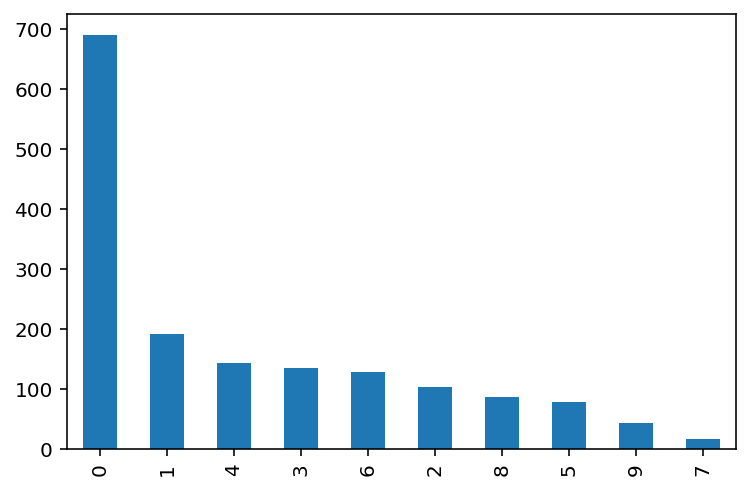

In [21]:
## Melihat grafik bar pada kategori type
data['Kategori_Type'].value_counts().plot(kind= 'bar')  

In [22]:
## Mengetahui Seberapa banyak kata yang ada di baris dari kolom "Clean_PERBAIKAN"
data["Clean_PERBAIKAN"].value_counts()

maintenance                                          116
setup mesin baru dan training user                    77
ganti toner                                           17
cek mesin ambil status page                            9
gsp fk                                                 8
                                                    ... 
clean left cover cek printer properties                1
setting print scan                                     1
ambil kertas nyangkut clean pulley dp maintenance      1
clean eprom drum                                       1
repair drum unit                                       1
Name: Clean_PERBAIKAN, Length: 1239, dtype: int64

In [23]:
## Merubah isi data teks menjadi numerik menggunakan kondisi if elif pada kolom "Clean_PERBAIKAN" dan membuat kolom baru yaitu "Kategori_Perbaikan"
label = []
for index, row in data.iterrows():
    if row["Clean_PERBAIKAN"] == 'maintenance':
        label.append(1)
    elif row["Clean_PERBAIKAN"] == 'setup mesin baru dan training user':
        label.append(2)
    elif row["Clean_PERBAIKAN"] == 'ganti toner':
        label.append(3)
    elif row["Clean_PERBAIKAN"] == 'cek ambil status page':
        label.append(4)
    elif row["Clean_PERBAIKAN"] == 'kuras dk':
        label.append(5)
    else:
        label.append(0)
        
data["Kategori_Perbaikan"] = label
data

,Customer,Type,S/N,STATUS,PROBLEM,PERBAIKAN,Clean_PROBLEM,Clean_PERBAIKAN,Kategori_Problem,Kategori_Type,Kategori_Perbaikan
0,Bank Victoria Cab. Mangga Besar,M-2535dn,LZP5X03812,GSP,Mesin noise,GSP Heatroll dan Bushing,mesin noise,gsp heatroll dan bushing,5,2,0
1,Kementerian Pekerja Umum Bag. Umum,TA-3501i,LUN3Z00240,UMC,Hasil Bentol dan Garis,Clean MC dan Clean Sit Glass,hasil bentol dan garis,clean mc dan clean sit glass,0,0,0
2,Bank Panin Cab. Sudirman Bag. Teller,M-2535dn,LZP6Z08461,UMC,Paper Jam,Setting Cassete Folio,paper jam,setting cassete folio,1,2,0
3,Metro 55,TA-1800,LT14Y16405,UMC,Hasil Bergaris,"Kuras Drum, Clean Cleaning Blade",hasil bergaris,kuras drum clean cleaning blade,2,7,0
4,Bank OCBC NISP Cab. Tendean,M-2535dn,LZP6405812,UMC,Paper Jam DP + Cassete,"Clean Pulley DP, Clean Pulley Cassete",paper jam dp cassete,clean pulley dp clean pulley cassete,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1615,Halik Selindo Alpha,TA-180,QLZ1306551,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2,8,0
1616,Halik Selindo Alpha,TA-180,QLZ1Z09159,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2,8,0
1617,Halik Selindo Alpha,TA-180,QLZ0103834,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2,8,0
1618,Halik Selindo Alpha,M-2540dn,LZP7610230,UMC,Hasil kotor,"Kuras drum, Clean CL, Order drum+Cleaning blade",hasil kotor,kuras drum clean cl order drum cleaning blade,3,1,0


In [24]:
## Mengetahui Seberapa banyak kata yang ada di baris dari kolom "Kategori_Perbaikan"
data["Kategori_Perbaikan"].value_counts()

0    1402
1     116
2      77
3      17
5       8
Name: Kategori_Perbaikan, dtype: int64

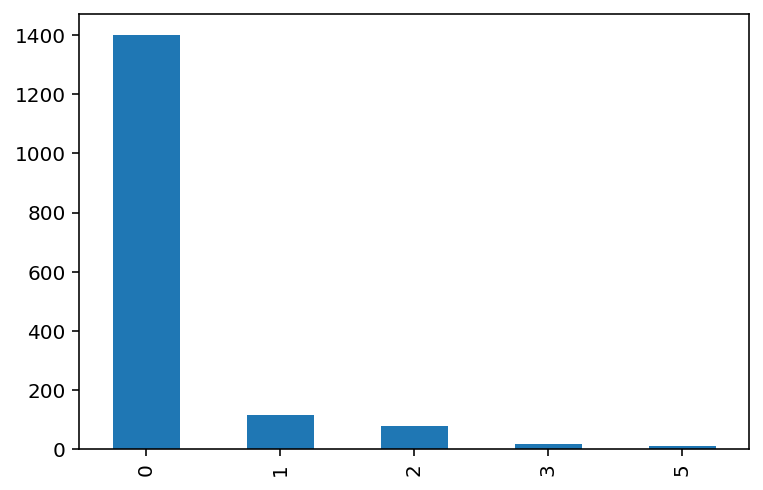

In [25]:
## Melihat grafik bar pada kategori perbaikan
data['Kategori_Perbaikan'].value_counts().plot(kind= 'bar')  

In [26]:
## Mengetahui Seberapa banyak kata yang ada di baris dari kolom "STATUS"
data["STATUS"].value_counts()

UMC         1069
UMC + MM     164
MM           138
GSP          110
STP           71
OTH           67
UMC            1
Name: STATUS, dtype: int64

In [27]:
## Merubah isi data teks menjadi numerik menggunakan kondisi if elif pada kolom "STATUS" dan membuat kolom baru yaitu "Kategori_Status"
label = []
for index, row in data.iterrows():
    if row["STATUS"] == 'UMC':
        label.append(1)
    elif row["STATUS"] == 'UMC + MM':
        label.append(2)
    elif row["STATUS"] == 'MM':
        label.append(3)
    elif row["STATUS"] == 'GSP':
        label.append(4)
    elif row["STATUS"] == 'STP':
        label.append(5)
    elif row["STATUS"] == 'OTH':
        label.append(6)
    else:
        label.append(0)
        
data["Kategori_Status"] = label
data

,Customer,Type,S/N,STATUS,PROBLEM,PERBAIKAN,Clean_PROBLEM,Clean_PERBAIKAN,Kategori_Problem,Kategori_Type,Kategori_Perbaikan,Kategori_Status
0,Bank Victoria Cab. Mangga Besar,M-2535dn,LZP5X03812,GSP,Mesin noise,GSP Heatroll dan Bushing,mesin noise,gsp heatroll dan bushing,5,2,0,4
1,Kementerian Pekerja Umum Bag. Umum,TA-3501i,LUN3Z00240,UMC,Hasil Bentol dan Garis,Clean MC dan Clean Sit Glass,hasil bentol dan garis,clean mc dan clean sit glass,0,0,0,1
2,Bank Panin Cab. Sudirman Bag. Teller,M-2535dn,LZP6Z08461,UMC,Paper Jam,Setting Cassete Folio,paper jam,setting cassete folio,1,2,0,1
3,Metro 55,TA-1800,LT14Y16405,UMC,Hasil Bergaris,"Kuras Drum, Clean Cleaning Blade",hasil bergaris,kuras drum clean cleaning blade,2,7,0,1
4,Bank OCBC NISP Cab. Tendean,M-2535dn,LZP6405812,UMC,Paper Jam DP + Cassete,"Clean Pulley DP, Clean Pulley Cassete",paper jam dp cassete,clean pulley dp clean pulley cassete,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1615,Halik Selindo Alpha,TA-180,QLZ1306551,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2,8,0,2
1616,Halik Selindo Alpha,TA-180,QLZ1Z09159,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2,8,0,2
1617,Halik Selindo Alpha,TA-180,QLZ0103834,UMC + MM,Hasil bergaris,"Maintenance, Clean shit glass",hasil bergaris,maintenance clean shit glass,2,8,0,2
1618,Halik Selindo Alpha,M-2540dn,LZP7610230,UMC,Hasil kotor,"Kuras drum, Clean CL, Order drum+Cleaning blade",hasil kotor,kuras drum clean cl order drum cleaning blade,3,1,0,1


In [28]:
## Mengetahui Seberapa banyak kata yang ada di baris dari kolom "Kategori_Status"
data["Kategori_Status"].value_counts()

1    1069
2     164
3     138
4     110
5      71
6      67
0       1
Name: Kategori_Status, dtype: int64

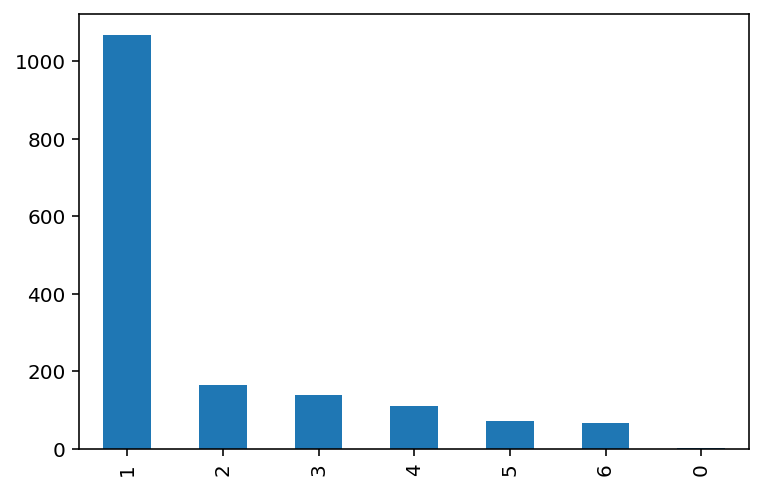

In [29]:
## Melihat grafik bar pada kategori status
data['Kategori_Status'].value_counts().plot(kind= 'bar')  

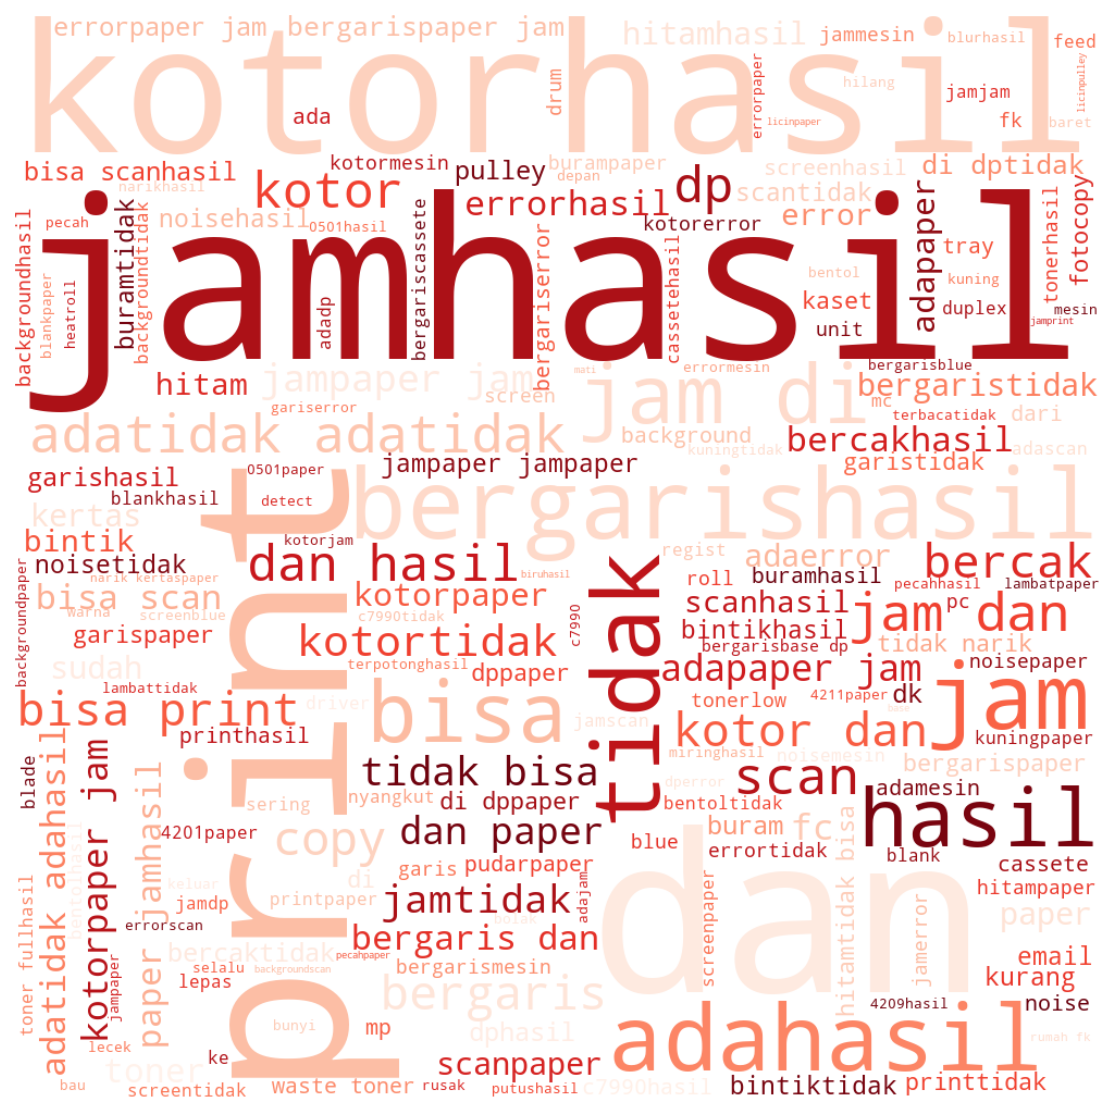

In [30]:
## Menampilkan WordCloud Keseluruhan Kata-Kata yang sudah dirubah menjadi numerik pada Kategori Problem
from wordcloud import WordCloud
import matplotlib.pyplot as plt

train_s0 = data[data["Kategori_Problem"] <= 9]
all_text_s0 = ''.join(word for word in train_s0["Clean_PROBLEM"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

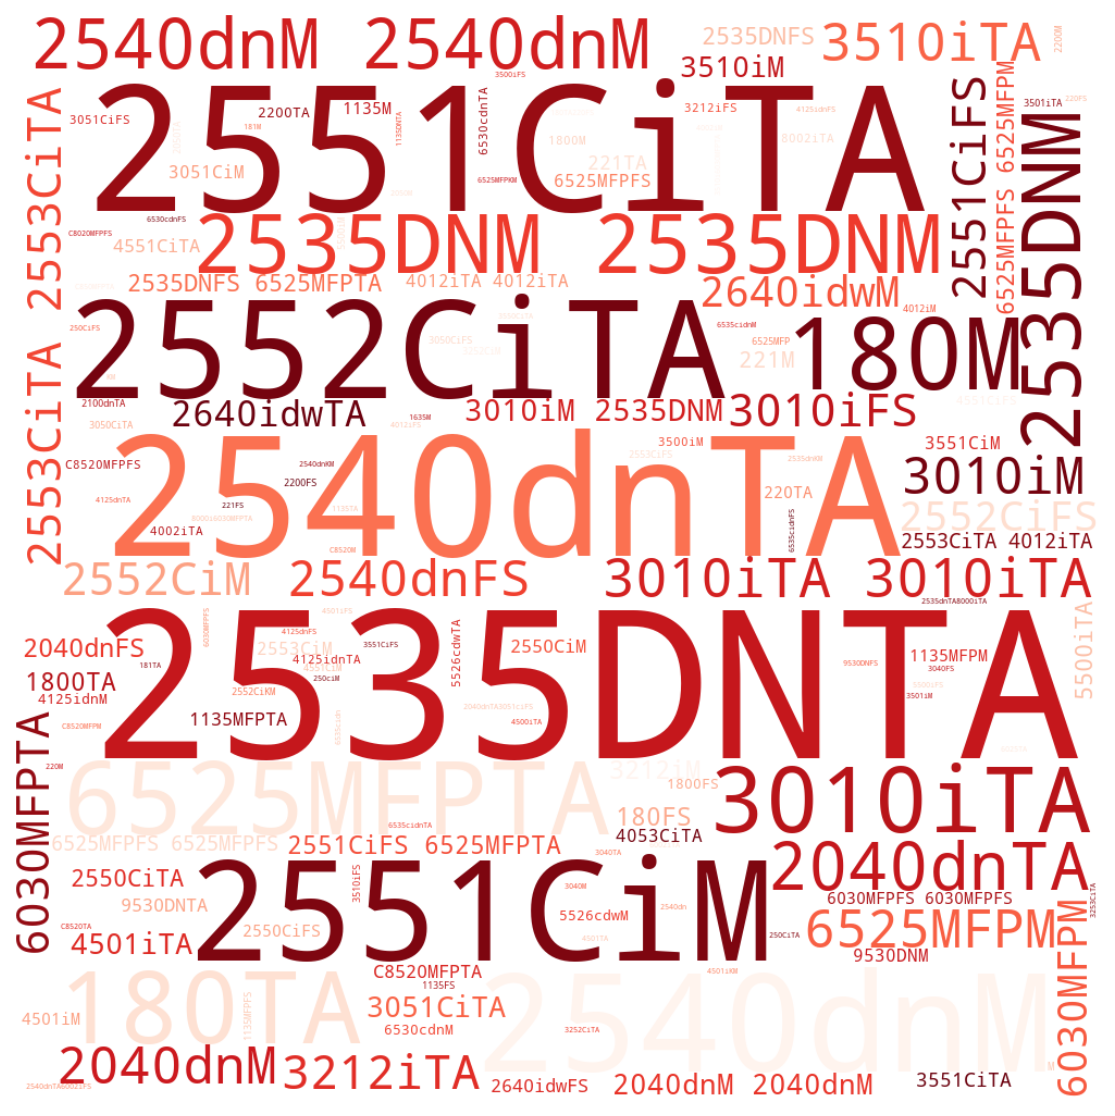

In [31]:
## Menampilkan WordCloud Keseluruhan Kata-Kata yang sudah dirubah menjadi numerik pada Kategori Type
from wordcloud import WordCloud
import matplotlib.pyplot as plt

train_s0 = data[data["Kategori_Type"] <= 9]
all_text_s0 = ''.join(word for word in train_s0["Type"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

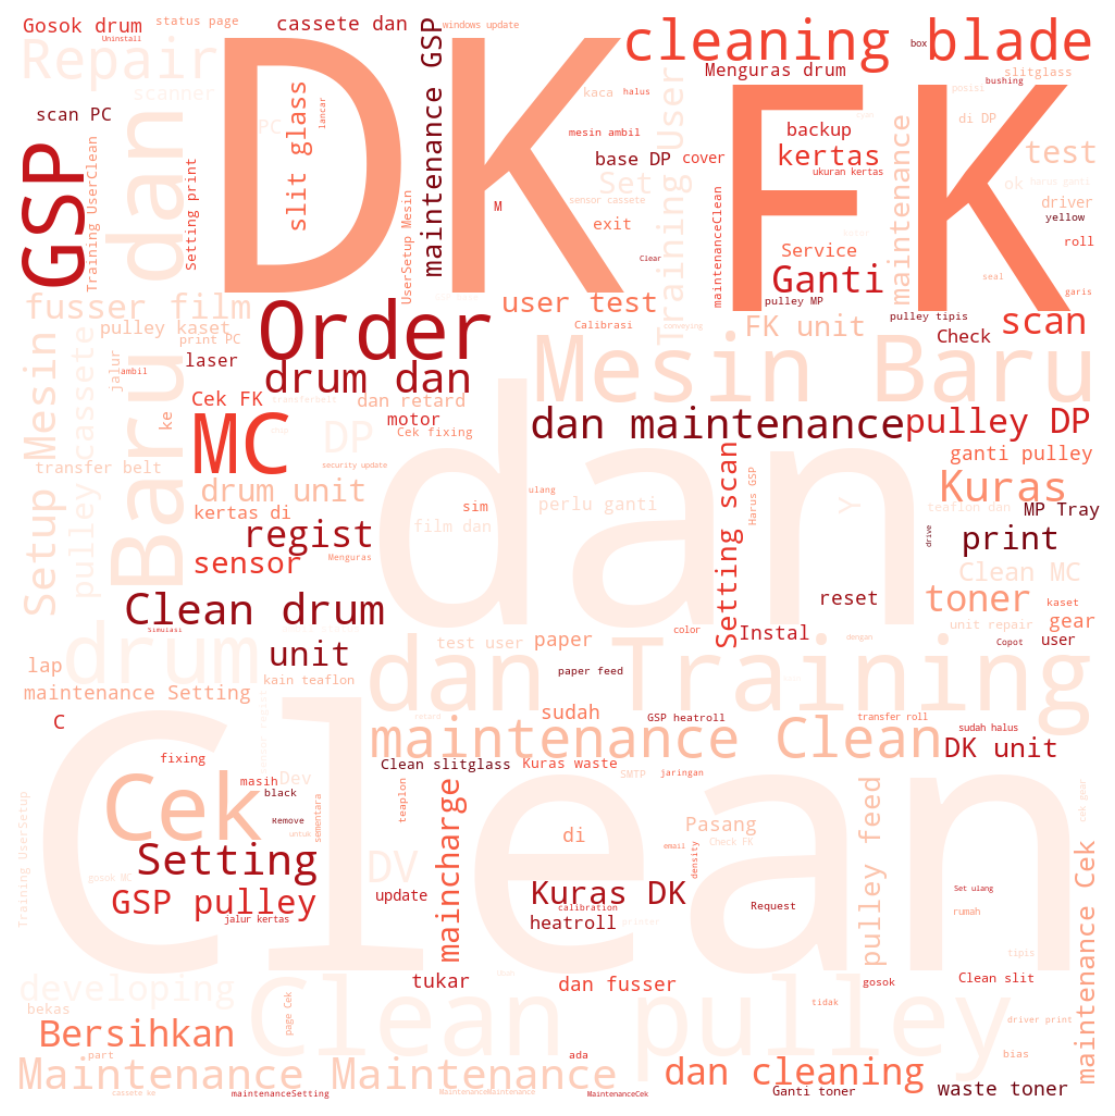

In [32]:
## Menampilkan WordCloud Keseluruhan Kata-Kata yang sudah dirubah menjadi numerik pada Kategori Type
from wordcloud import WordCloud
import matplotlib.pyplot as plt

train_s0 = data[data["Kategori_Perbaikan"] <= 5]
all_text_s0 = ''.join(word for word in train_s0["PERBAIKAN"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [33]:
## Data Engineering pada Kolom Clean Problem menggunakan Teknik TfidfVectorizer
Count_vect = CountVectorizer(max_features=1620)
Count_vect.fit(data['Clean_PROBLEM'])
print(Count_vect.vocabulary_)

{'mesin': 282, 'noise': 290, 'hasil': 199, 'bentol': 58, 'dan': 132, 'garis': 186, 'paper': 300, 'jam': 218, 'bergaris': 63, 'dp': 151, 'cassete': 116, 'di': 139, 'base': 51, 'retak': 337, 'rusak': 343, 'pulley': 327, 'licin': 261, 'clip': 123, 'nyangkut': 294, 'sudah': 374, 'kotor': 242, 'error': 160, 'mati': 272, 'total': 401, 'tbo': 376, '0509': 6, 'tidak': 396, 'bisa': 71, 'scan': 347, 'to': 399, 'email': 156, 'time': 397, 'for': 179, 'maintenance': 269, 'c7990': 113, 'bercak': 60, 'biru': 70, 'toner': 400, 'empty': 157, 'mp': 286, 'tray': 405, 'lepas': 259, 'background': 42, 'ada': 36, 'bintik': 69, 'copy': 128, 'fax': 167, 'print': 321, 'pecah': 306, 'buram': 82, 'hitam': 206, 'shake': 364, 'the': 395, 'fd': 169, 'kurang': 246, 'terang': 380, 'failure': 166, 'pudar': 326, 'blank': 74, 'setengah': 362, 'kaset': 229, 'dipakai': 143, '0518': 9, 'macet': 266, 'bunyi': 81, 'kasar': 228, 'setting': 363, 'en': 158, 'kabel': 222, 'power': 319, 'terbakar': 382, 'bagus': 44, 'hinge': 204, 

In [34]:
## Data Engineering pada Kolom Type menggunakan Teknik TfidfVectorizer
Count_vect = CountVectorizer(max_features=1620)
Count_vect.fit(data['Type'])
print(Count_vect.vocabulary_)

{'2535dn': 14, 'ta': 59, '3501i': 29, '1800': 5, '3010i': 21, '180': 4, '2551ci': 17, 'fs': 57, '1135mfp': 2, 'c8520mfp': 56, '2040dn': 7, '2540dn': 15, '2552ci': 18, '6525mfp': 47, '3253ci': 27, '3051ci': 24, '3510i': 30, '4551ci': 41, '6530cdn': 48, '2553ci': 19, '2550ci': 16, '4501i': 40, '2100dn': 9, '3212i': 25, '2640idw': 20, '6030mfp': 46, 'km': 58, '2050': 8, '3500i': 28, '5526cdw': 43, '2200': 11, '221': 12, '1135': 0, '9530dn': 52, '220': 10, '5500i': 42, '3551ci': 32, '3050ci': 23, '1135dn': 1, 'c8020mfp': 53, '4002i': 33, '1635': 3, '4125idn': 37, '6535cidn': 49, '3040': 22, '8002i': 51, 'c850mfp': 54, '250ci': 13, '181': 6, '3550ci': 31, '6002i': 44, '4125dn': 36, '4012i': 34, '3252ci': 26, '4053ci': 35, '6025': 45, 'c8520': 55, '8000i': 50, '4500i': 38, '4501': 39, 'ta8000i': 63, 'ta220': 60, 'ta6002i': 62, 'ta3051ci': 61}


In [35]:
## Data Engineering pada Kolom PERBAIKAN menggunakan Teknik TfidfVectorizer
Count_vect = CountVectorizer(max_features=1620)
Count_vect.fit(data['Clean_PERBAIKAN'])
print(Count_vect.vocabulary_)

{'gsp': 293, 'heatroll': 303, 'dan': 191, 'bushing': 124, 'clean': 155, 'mc': 411, 'sit': 603, 'glass': 289, 'setting': 590, 'cassete': 138, 'folio': 267, 'kuras': 366, 'drum': 236, 'cleaning': 156, 'blade': 106, 'pulley': 523, 'dp': 231, 'cek': 142, 'unit': 679, 'simulasi': 600, '203': 23, '906': 41, 'open': 459, 'sensor': 585, 'maintenance': 403, 'ambil': 62, 'paper': 467, 'clip': 159, 'di': 205, 'roll': 561, 'mesin': 425, 'break': 117, 'down': 229, 'dk': 225, 'fk': 264, 'primary': 515, 'feed': 256, 'mk': 430, '470': 35, 'cabut': 129, 'connector': 173, 'calibration': 132, 'tone': 656, 'curve': 184, 'check': 147, 'and': 64, 'kabel': 331, 'slit': 607, 'adjustment': 53, 'repair': 543, 'cip': 149, 'tbo': 633, 'bersihkan': 100, 'by': 126, 'pass': 473, 'gear': 286, 'test': 645, 'user': 684, 'scan': 573, 'email': 243, 'reset': 550, '251': 26, 'waste': 688, 'toner': 657, 'ubah': 673, 'posisi': 508, 'kertas': 350, 'pasang': 472, 'ngelupas': 446, 'harus': 299, 'mp': 436, 'tray': 662, 'dev': 20

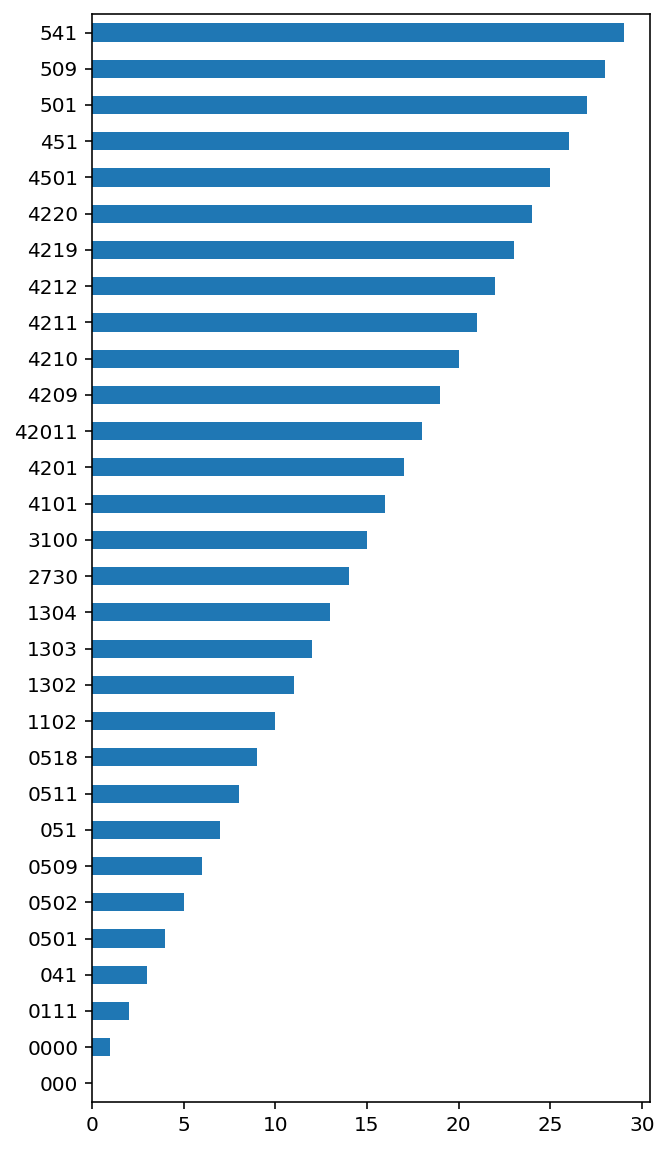

In [36]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(data['Clean_PROBLEM'])
dictionary = count_vectorizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=True)
top_vacab = vocab_bef_stem.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10))

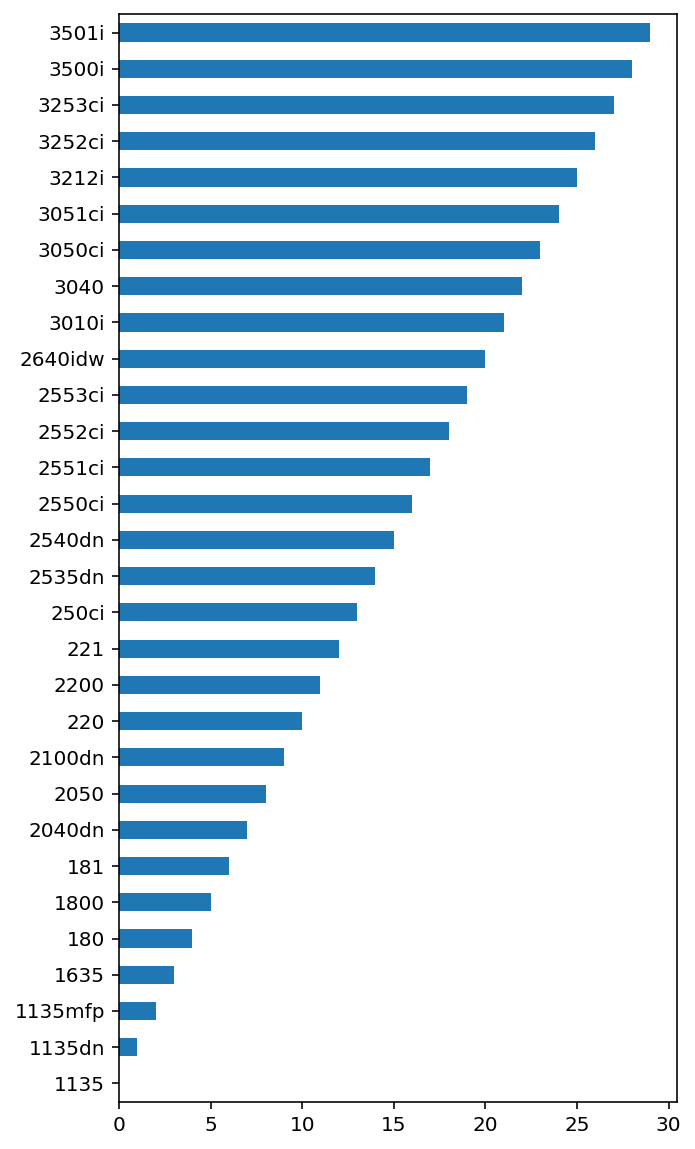

In [37]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(data['Type'])
dictionary = count_vectorizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=True)
top_vacab = vocab_bef_stem.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10))

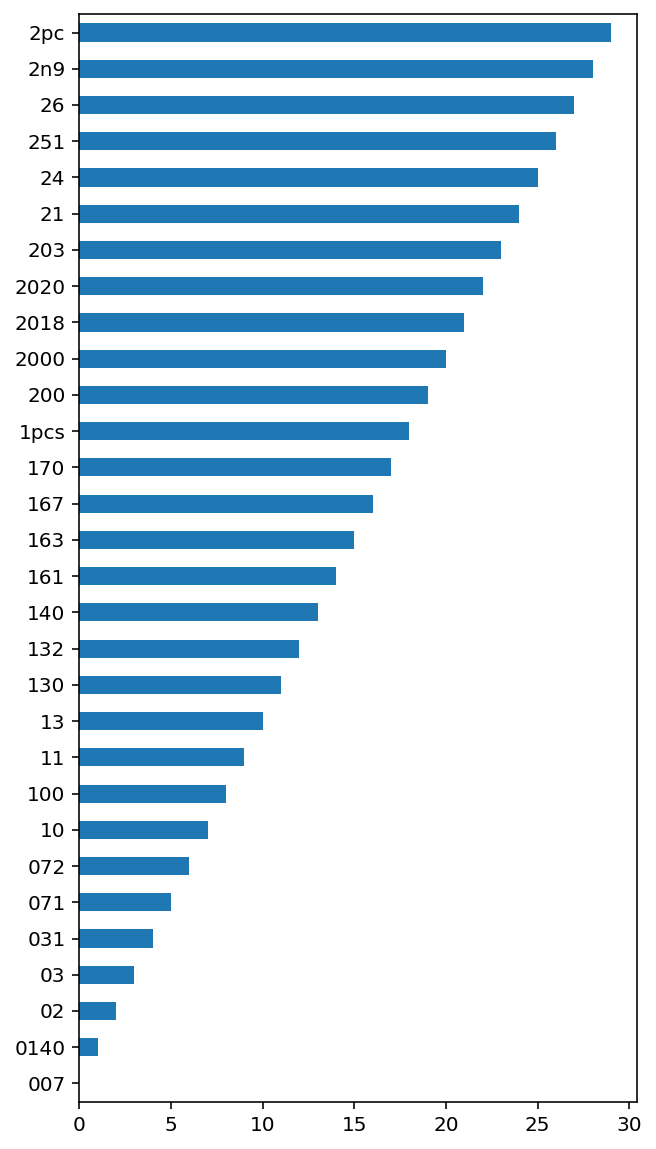

In [38]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(data['Clean_PERBAIKAN'])
dictionary = count_vectorizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=True)
top_vacab = vocab_bef_stem.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [39]:
## Data Selection Setelah diubah menjadi Numerik
data = data.copy()
data = data[["Kategori_Problem", "Kategori_Type", "Kategori_Perbaikan", "Kategori_Status"]]
data.head(100)

,Kategori_Problem,Kategori_Type,Kategori_Perbaikan,Kategori_Status
0,5,2,0,4
1,0,0,0,1
2,1,2,0,1
3,2,7,0,1
4,0,2,0,1
...,...,...,...,...
95,0,0,0,1
96,0,8,2,5
97,0,9,2,5
98,0,0,0,1


In [40]:
## Melihat Informasi data dari dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Kategori_Problem    1620 non-null   int64
 1   Kategori_Type       1620 non-null   int64
 2   Kategori_Perbaikan  1620 non-null   int64
 3   Kategori_Status     1620 non-null   int64
dtypes: int64(4)
memory usage: 50.8 KB


In [41]:
## Memasukkan Library yang dibutuhkan untuk Clustering K-Means dan K-Medoids
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

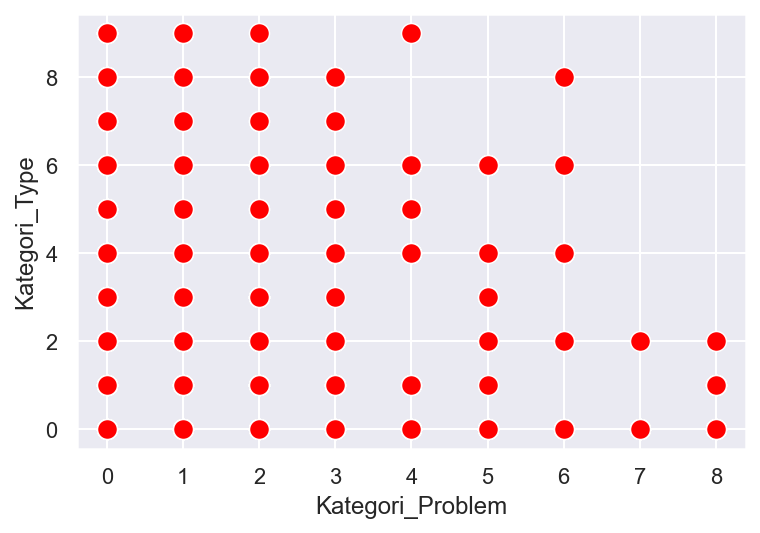

In [42]:
sns.scatterplot(x="Kategori_Problem", y="Kategori_Type", data=data, s=100, color="red", alpha = 1)

# CLUSTERING K-MEANS

In [43]:
#ALGORITMA CLUSTERING K-MEANS
#menentukan variabel kluster
data_X = data[['Kategori_Problem','Kategori_Type', 'Kategori_Perbaikan', 'Kategori_Status']]
data_X.head()
#membuat array
X_array =  np.array(data_X)
print(X_array)

[[5 2 0 4]
 [0 0 0 1]
 [1 2 0 1]
 ...
 [2 8 0 2]
 [3 1 0 1]
 [3 1 0 1]]


In [44]:
#ALGORITMA CLUSTERING K-MEANS
# menstandarkan ukuran variabel
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_array)
# membuat fungsi k-means
kmeans = KMeans(n_clusters = 9, random_state=60)
# Menentukan kluster dari data
kmeans.fit(X_scaled)

KMeans(n_clusters=9, random_state=60)

In [45]:
#ALGORITMA CLUSTERING K-MEANS
print(kmeans.cluster_centers_)

[[ 3.12500000e-02  2.40346730e-02  1.06382979e-03  1.87352246e-01]
 [ 3.86178862e-02  7.55194219e-01  1.05691057e-02  2.10704607e-01]
 [ 3.06919643e-02  3.07539683e-02  1.37500000e-01  7.01636905e-01]
 [ 6.16477273e-01  5.17676768e-02 -6.93889390e-18  1.98863636e-01]
 [ 3.67647059e-02  7.77777778e-01  1.56862745e-01  8.85620915e-01]
 [ 3.25520833e-02  4.64120370e-01  1.04166667e-01  6.02430556e-01]
 [ 2.74509804e-02  3.36819172e-01  1.56862745e-03  1.90196078e-01]
 [ 4.73484848e-01  4.98316498e-01 -6.93889390e-18  1.91919192e-01]
 [ 1.20833333e-01  8.51851852e-02  6.60000000e-01  1.66666667e-01]]


In [46]:
#ALGORITMA CLUSTERING K-MEANS
print(kmeans.labels_)

[3 0 6 ... 1 3 3]


In [47]:
#ALGORITMA CLUSTERING K-MEANS
data["Cluster(K-Means)"] = kmeans.labels_
data

,Kategori_Problem,Kategori_Type,Kategori_Perbaikan,Kategori_Status,Cluster(K-Means)
0,5,2,0,4,3
1,0,0,0,1,0
2,1,2,0,1,6
3,2,7,0,1,1
4,0,2,0,1,6
...,...,...,...,...,...
1615,2,8,0,2,1
1616,2,8,0,2,1
1617,2,8,0,2,1
1618,3,1,0,1,3


In [48]:
data["Cluster(K-Means)"].value_counts()

0    564
6    255
1    246
2    224
5     96
3     88
7     66
4     51
8     30
Name: Cluster(K-Means), dtype: int64

In [49]:
#ALGORITMA CLUSTERING K-MEANS
X = data.iloc[:, [0, 1]].values

In [50]:
#ALGORITMA CLUSTERING K-MEANS
Y = data.iloc[:, [1, 2]].values

In [51]:
#ALGORITMA CLUSTERING K-MEANS
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter =300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

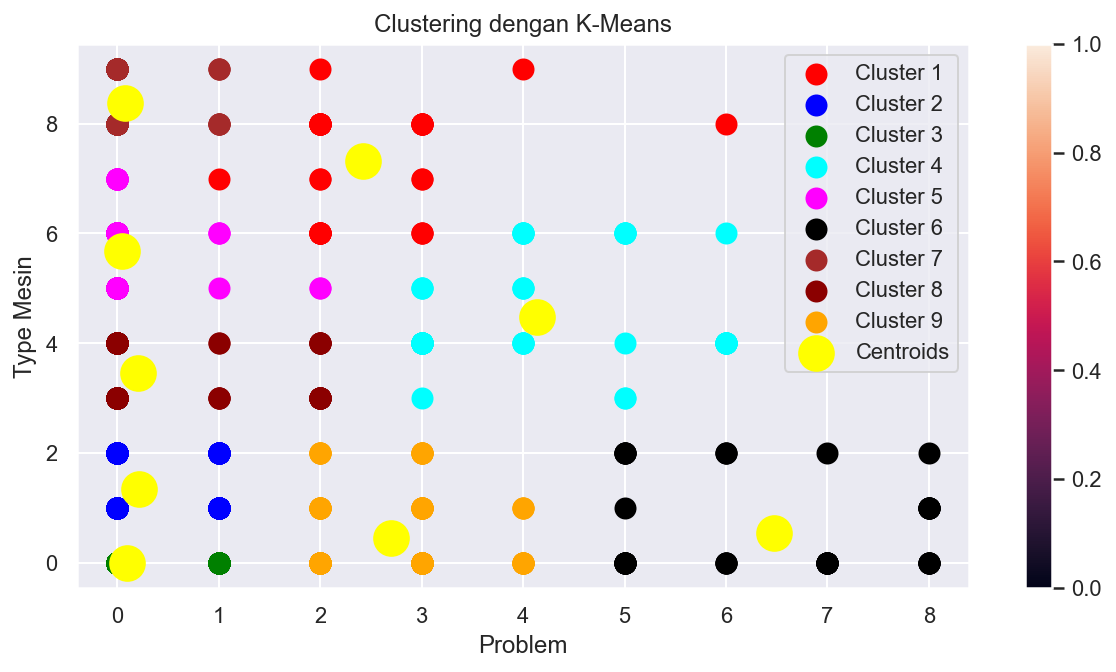

In [52]:
#VISUALISASI ALGORITMA CLUSTERING K-MEANS
plt.figure(figsize=[10, 5])

output = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
output = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
output = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
output = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
output = plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
output = plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
output = plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'brown', label = 'Cluster 7')
output = plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'darkred', label = 'Cluster 8')
output = plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = 'orange', label = 'Cluster 9')
output = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clustering dengan K-Means')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.legend()
plt.colorbar (output)
plt.show()

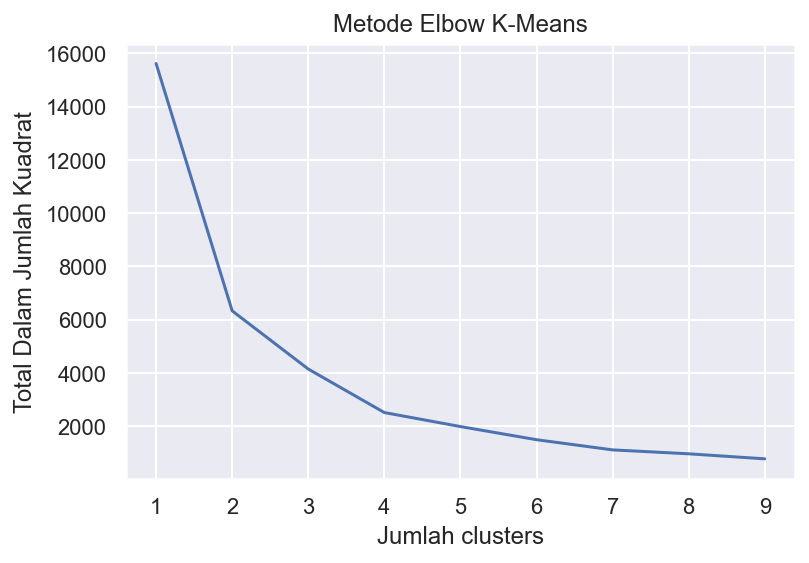

In [53]:
# Menggunakan Metode Elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=100, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Metode Elbow K-Means')
plt.xlabel('Jumlah clusters')
plt.ylabel('Total Dalam Jumlah Kuadrat')
plt.show()

In [54]:
## Mengetahui nilai rata-rata Silhouette pada K-Means
silhouette_avg = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % silhouette_avg)

Silhouetter Score: 0.675


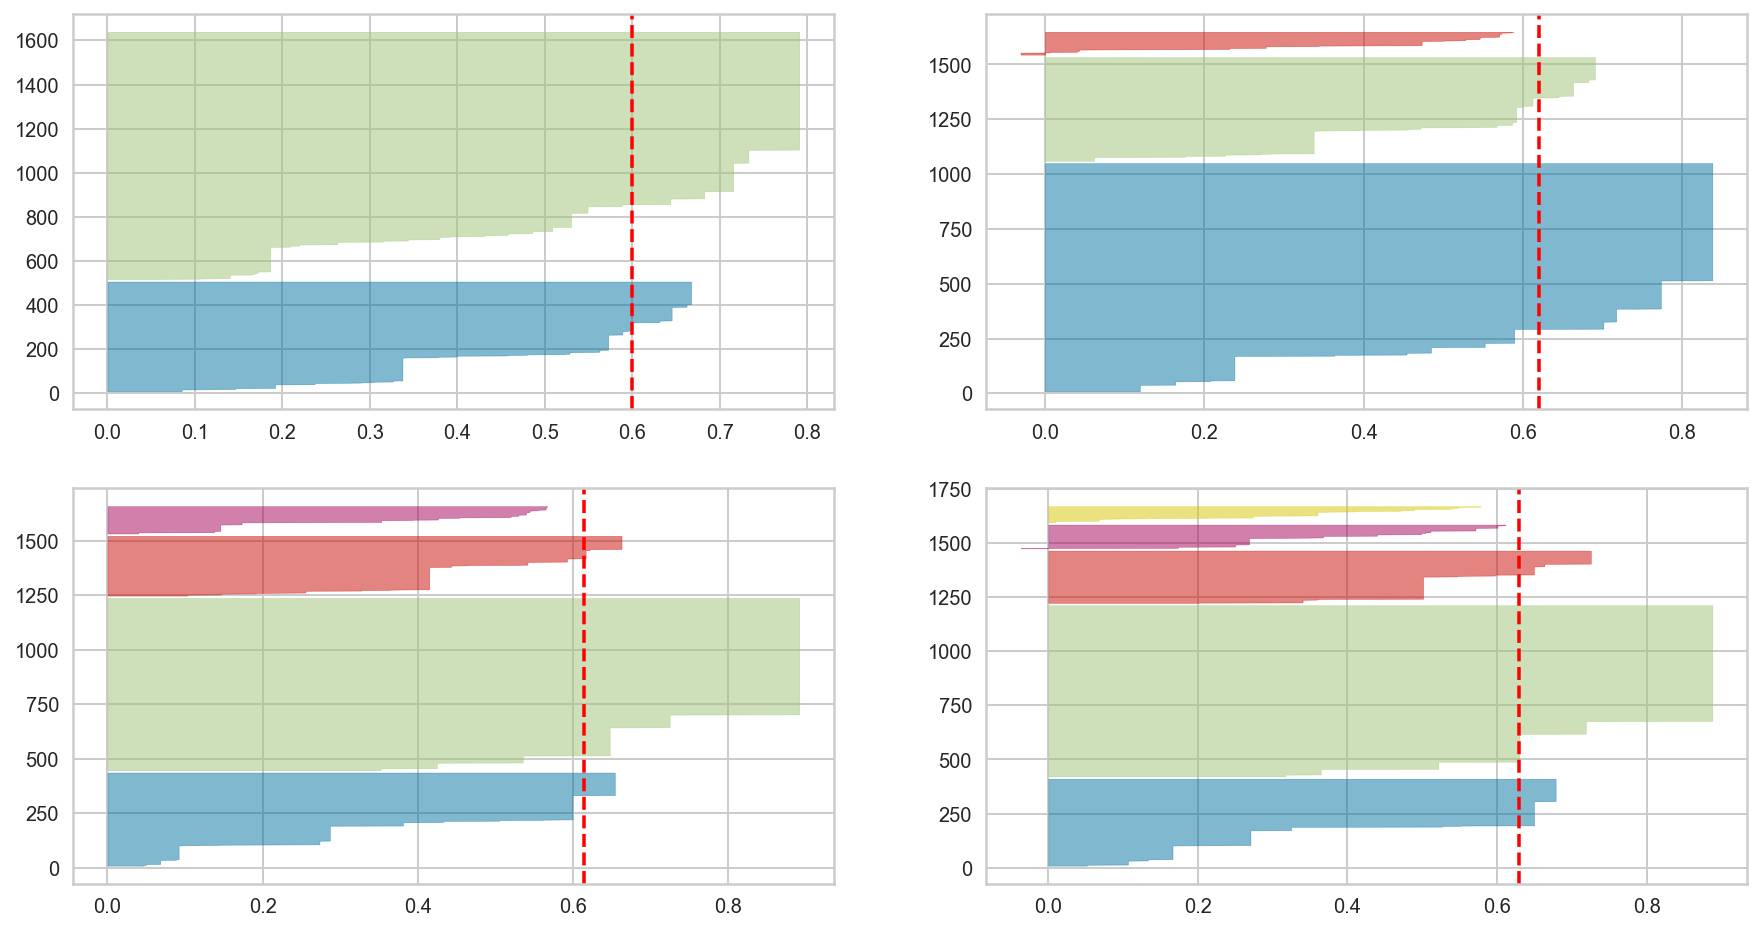

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Buat instance KMeans untuk jumlah cluster yang berbeda
    '''
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Buat instance SilhouetteVisualizer dengan instance KMeans
    Sesuaikan visualisatornya
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [56]:
#ALGORITMA CLUSTERING K-MEANS
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter =300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

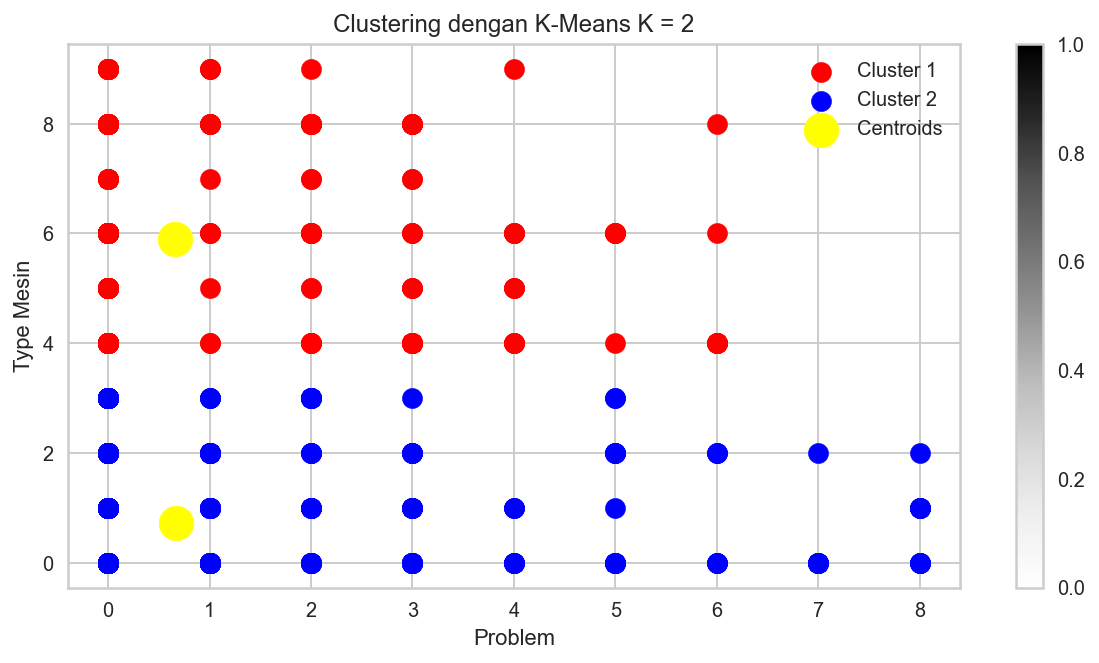

In [57]:
#VISUALISASI ALGORITMA CLUSTERING K-MEANS
plt.figure(figsize=[10, 5])

output = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
output = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
output = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clustering dengan K-Means K = 2')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.legend()
plt.colorbar (output)
plt.show()

In [58]:
#ALGORITMA CLUSTERING K-MEANS
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter =300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

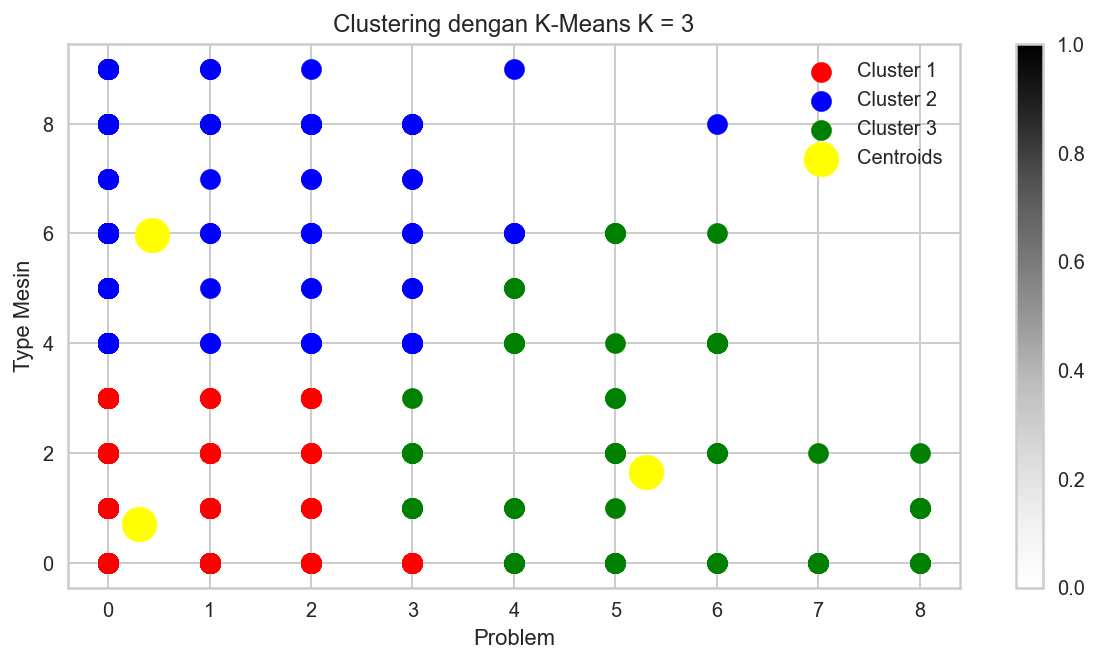

In [59]:
#VISUALISASI ALGORITMA CLUSTERING K-MEANS
plt.figure(figsize=[10, 5])

output = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
output = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
output = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
output = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clustering dengan K-Means K = 3')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.legend()
plt.colorbar (output)
plt.show()

In [60]:
#ALGORITMA CLUSTERING K-MEANS
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter =300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

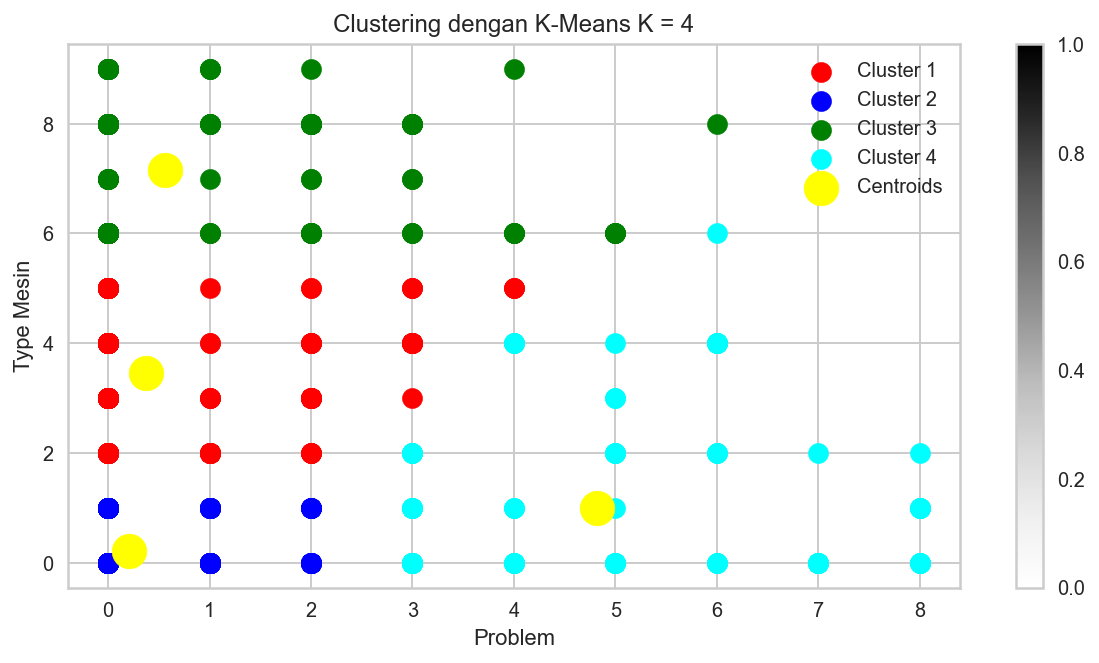

In [61]:
#VISUALISASI ALGORITMA CLUSTERING K-MEANS
plt.figure(figsize=[10, 5])

output = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
output = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
output = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
output = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
output = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clustering dengan K-Means K = 4')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.legend()
plt.colorbar (output)
plt.show()

In [62]:
#ALGORITMA CLUSTERING K-MEANS
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter =300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

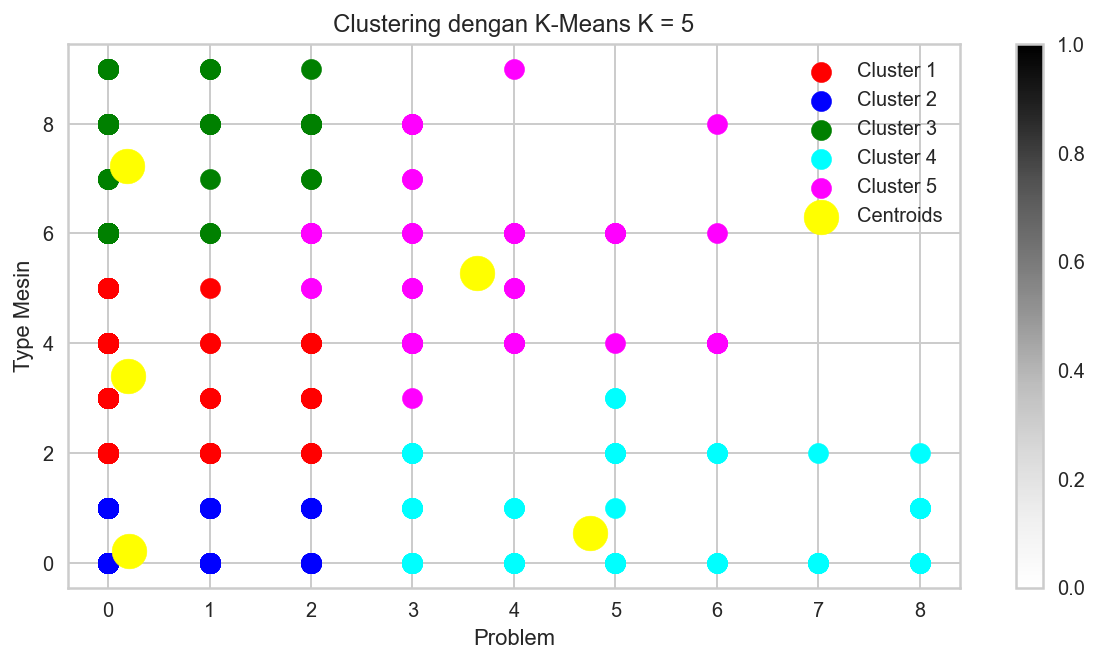

In [63]:
#VISUALISASI ALGORITMA CLUSTERING K-MEANS
plt.figure(figsize=[10, 5])

output = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
output = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
output = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
output = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
output = plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
output = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clustering dengan K-Means K = 5')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.legend()
plt.colorbar (output)
plt.show()

# CLUSTERING K-MEDOIDS

In [64]:
#ALGORITMA CLUSTERING K-MEDOIDS
#menentukan variabel kluster dari seluruh kolom
data_X = data[['Kategori_Problem','Kategori_Type', 'Kategori_Perbaikan', 'Kategori_Status']]
data_X.head()
#membuat array
X_array =  np.array(data_X)
print(X_array)

[[5 2 0 4]
 [0 0 0 1]
 [1 2 0 1]
 ...
 [2 8 0 2]
 [3 1 0 1]
 [3 1 0 1]]


In [65]:
#ALGORITMA CLUSTERING K-MEDOIDS
# menstandarkan ukuran variabel
scaler = StandardScaler().fit(data_X)
X_scaled = scaler.fit_transform(X_array)
# membuat fungsi k-means
kMedoids = KMedoids(init='k-medoids++',n_clusters = 9, random_state=60)
# Menentukan kluster dari data
kMedoids.fit(X_scaled)
y_kmed = kMedoids.fit_predict(X_scaled)

In [66]:
#ALGORITMA CLUSTERING K-MEDOIDS
print(kMedoids.cluster_centers_)

[[-0.44263524 -0.85202912 -0.33983805 -0.59770889]
 [-0.44263524  0.62145599 -0.33983805 -0.59770889]
 [ 2.21071941 -0.48365784 -0.33983805 -0.59770889]
 [-0.44263524 -0.48365784 -0.33983805  1.49513349]
 [-0.44263524 -0.48365784  2.71023201  2.19274761]
 [-0.44263524 -0.85202912  1.18519698  0.79751936]
 [ 4.2007354  -0.85202912  7.2853371  -0.59770889]
 [-0.44263524 -0.85202912  4.23526704 -0.59770889]
 [-0.44263524  2.09494109 -0.33983805 -0.59770889]]


In [67]:
#ALGORITMA CLUSTERING K-MEDOIDS
print(kMedoids.labels_)

[2 0 0 ... 8 2 2]


In [68]:
#ALGORITMA CLUSTERING K-MEDOIDS
data["Cluster(K-Medoids)"] = kMedoids.labels_
data

,Kategori_Problem,Kategori_Type,Kategori_Perbaikan,Kategori_Status,Cluster(K-Means),Cluster(K-Medoids)
0,5,2,0,4,3,2
1,0,0,0,1,0,0
2,1,2,0,1,6,0
3,2,7,0,1,1,8
4,0,2,0,1,6,0
...,...,...,...,...,...,...
1615,2,8,0,2,1,8
1616,2,8,0,2,1,8
1617,2,8,0,2,1,8
1618,3,1,0,1,3,2


In [69]:
data["Cluster(K-Medoids)"].value_counts()

0    627
1    326
3    190
2    156
8    127
5     92
4     72
7     24
6      6
Name: Cluster(K-Medoids), dtype: int64

In [70]:
#ALGORITMA CLUSTERING K-MEDOIDS
X = data.iloc[:, [0, 1]].values

In [71]:
#ALGORITMA CLUSTERING K-MEDOIDS
Y = data.iloc[:, [1, 2]].values

In [72]:
kmedoids = KMedoids(n_clusters = 9, init = 'k-medoids++', max_iter = 300, random_state = 0)
y_kmed = kmedoids.fit_predict(X_scaled)

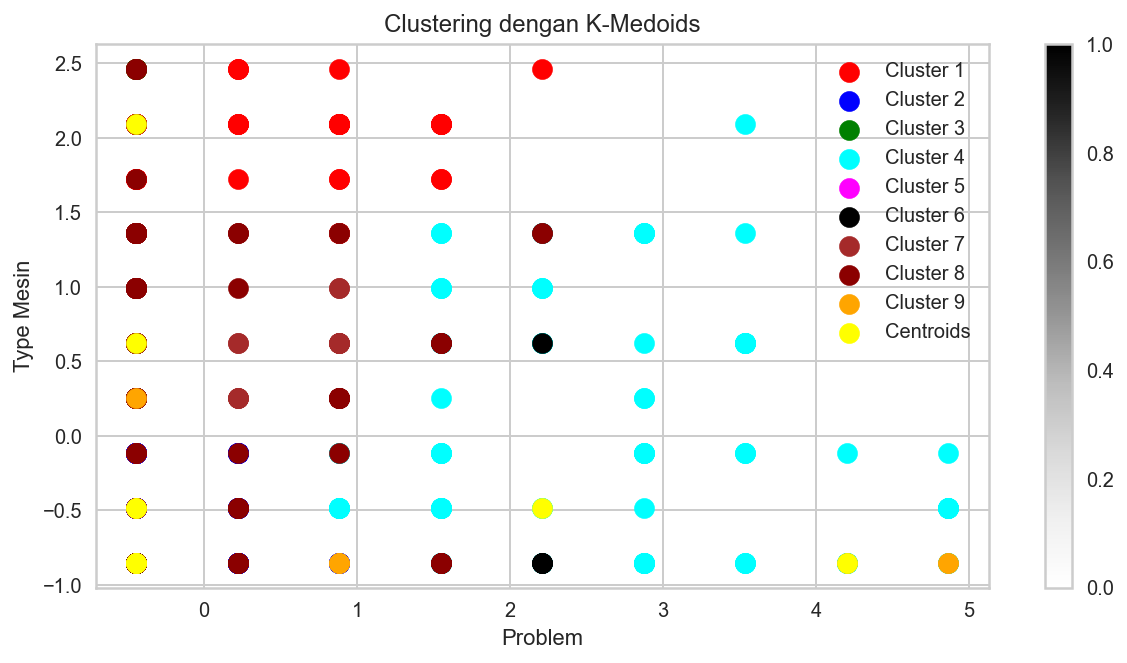

In [73]:
#VISUALISASI ALGORITMA CLUSTERING K-MEDOIDS
plt.figure(figsize=[10, 5])

output = plt.scatter(X_scaled[y_kmed == 0, 0], X_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
output = plt.scatter(X_scaled[y_kmed == 1, 0], X_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
output = plt.scatter(X_scaled[y_kmed == 2, 0], X_scaled[y_kmed == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
output = plt.scatter(X_scaled[y_kmed == 3, 0], X_scaled[y_kmed == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
output = plt.scatter(X_scaled[y_kmed == 4, 0], X_scaled[y_kmed == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
output = plt.scatter(X_scaled[y_kmed == 5, 0], X_scaled[y_kmed == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
output = plt.scatter(X_scaled[y_kmed == 6, 0], X_scaled[y_kmed == 6, 1], s = 100, c = 'brown', label = 'Cluster 7')
output = plt.scatter(X_scaled[y_kmed == 7, 0], X_scaled[y_kmed == 7, 1], s = 100, c = 'darkred', label = 'Cluster 8')
output = plt.scatter(X_scaled[y_kmed == 8, 0], X_scaled[y_kmed == 8, 1], s = 100, c = 'orange', label = 'Cluster 9')
output = plt.scatter(kMedoids.cluster_centers_[:, 0], kMedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clustering dengan K-Medoids')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.colorbar(output)
plt.legend()

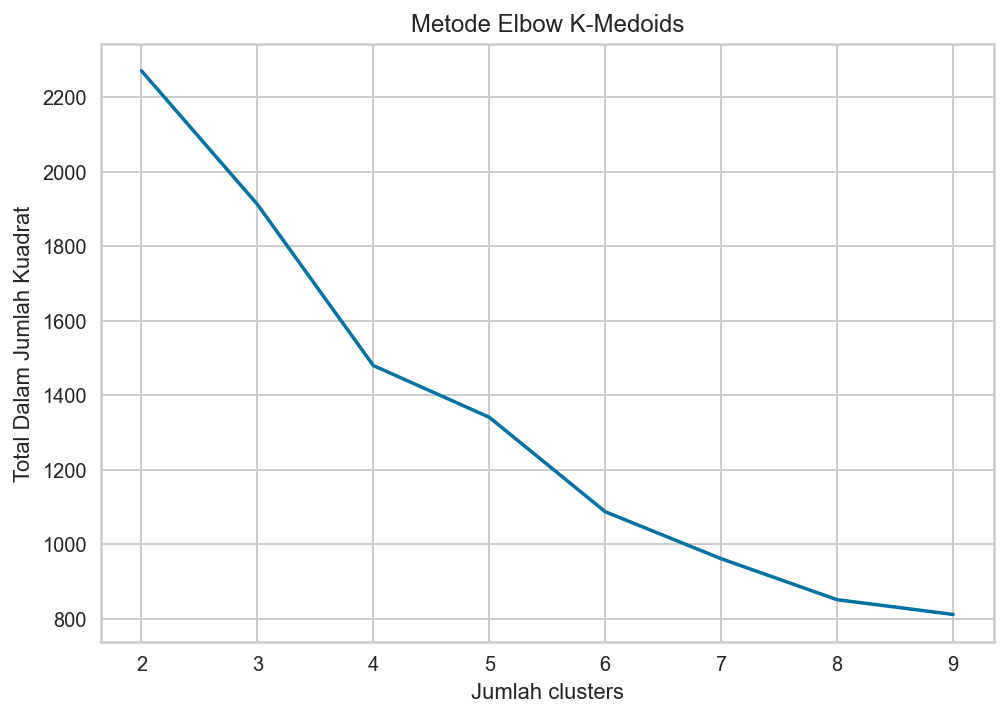

In [74]:
## Menggunakan Silhouette Width untuk menemukan jumlah cluster
from sklearn_extra.cluster import KMedoids
sw = []
for i in range(2, 10):
    kmedoids = KMedoids(n_clusters = i, init = 'k-medoids++', max_iter=100, random_state = 42)
    kmedoids.fit(X)
    sw.append(kmedoids.inertia_)
plt.plot(range(2, 10), sw)
plt.title('Metode Elbow K-Medoids')
plt.xlabel('Jumlah clusters')
plt.ylabel('Total Dalam Jumlah Kuadrat')
plt.show()

In [75]:
## Mengetahui nilai rata-rata Silhouette pada K-Medoids
silhouette_avg = silhouette_score(X, kMedoids.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % silhouette_avg)

Silhouetter Score: 0.116


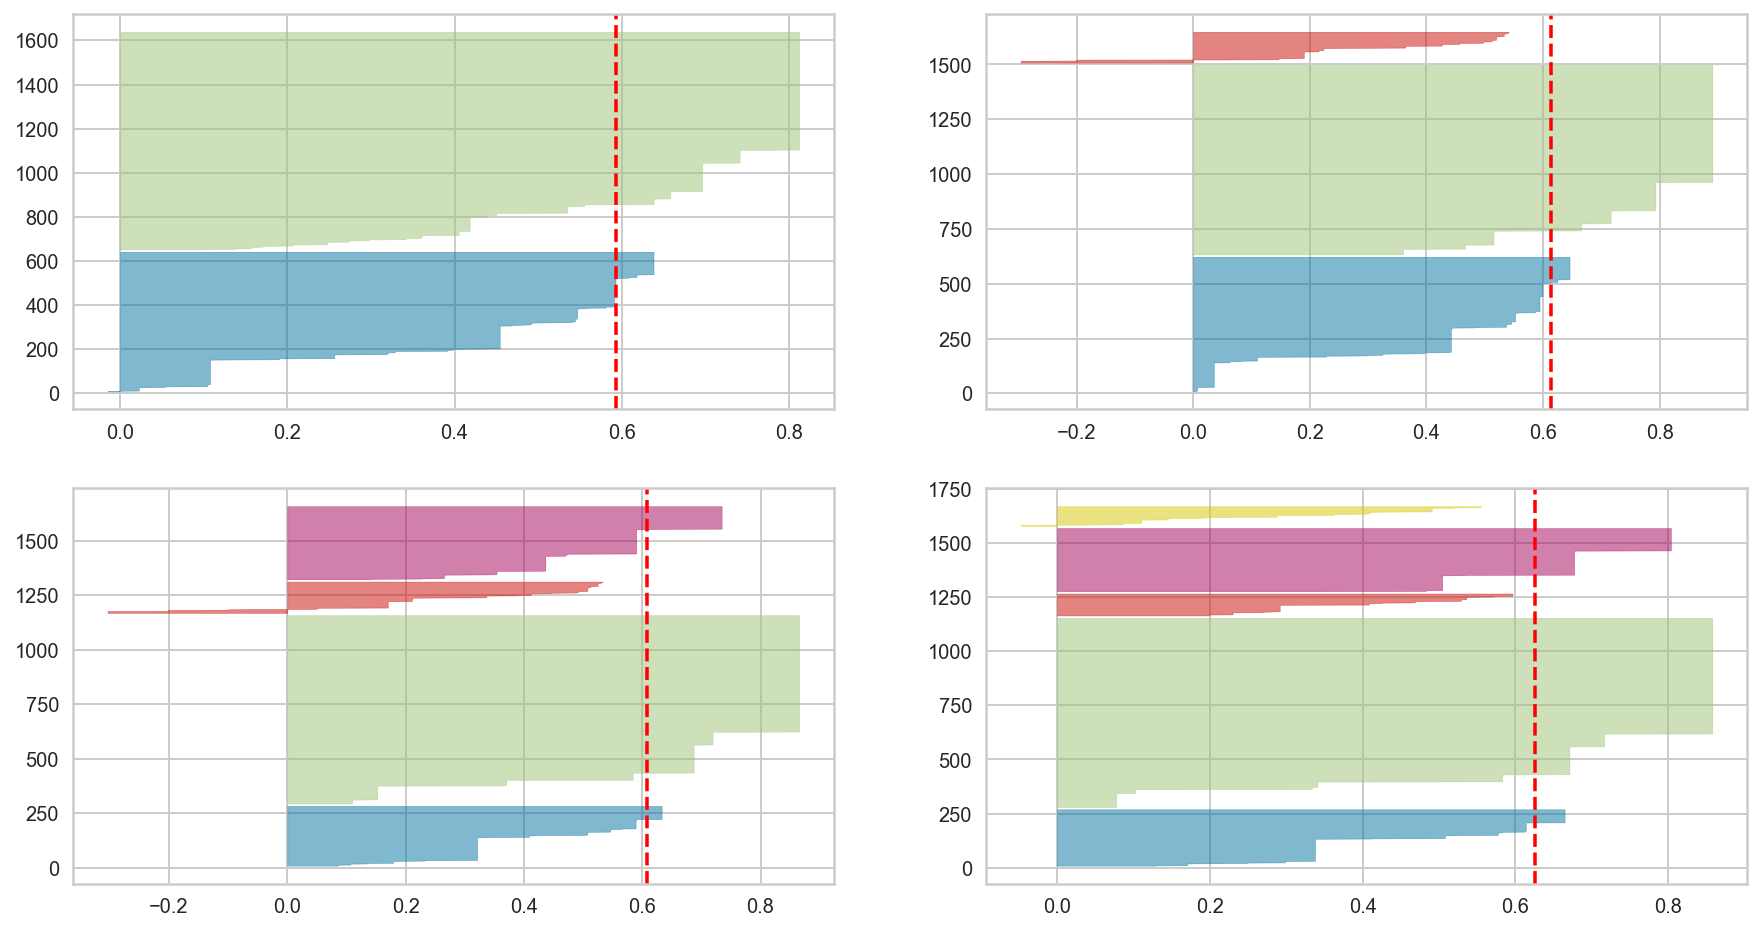

In [76]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Buat instance KMedoids untuk jumlah cluster yang berbeda
    '''
    kmedoids = KMedoids(n_clusters = i, init = 'k-medoids++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Buat instance SilhouetteVisualizer dengan instance KMedoids
    Sesuaikan visualisatornya
    '''
    visualizer = SilhouetteVisualizer(kmedoids, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [77]:
kmedoids = KMedoids(n_clusters = 2, init = 'k-medoids++', max_iter = 300, random_state = 0)
y_kmed = kmedoids.fit_predict(X_scaled)

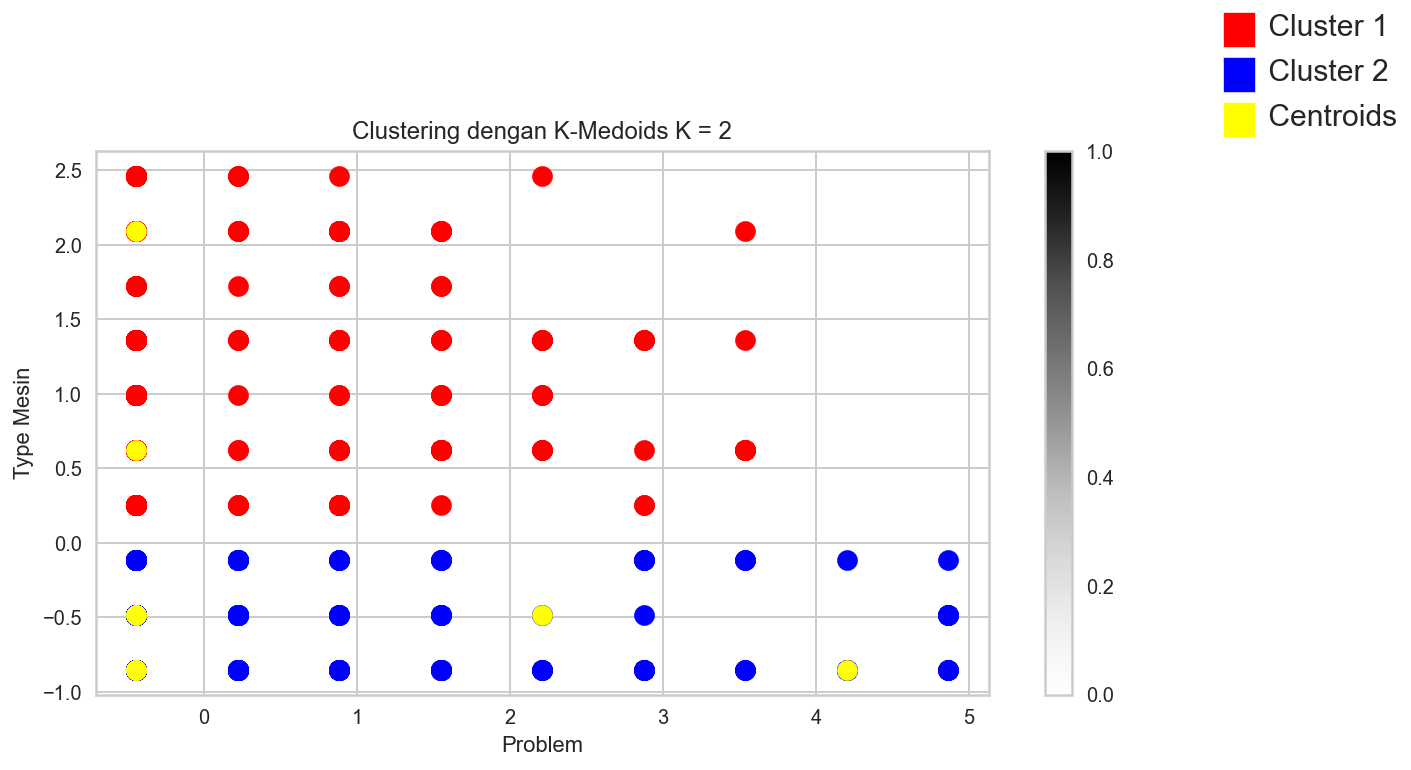

In [78]:
#VISUALISASI Algoritma Clustering K-MEANS pada nilai kemurnian Clustering K-MEDOIDS
plt.figure(figsize=[10, 5])
output = plt.scatter(X_scaled[y_kmed == 0, 0], X_scaled[y_kmed == 0, 1], s = 100, c = 'red')
output = plt.scatter(X_scaled[y_kmed == 1, 0], X_scaled[y_kmed == 1, 1], s = 100, c = 'blue')
output = plt.scatter(kMedoids.cluster_centers_[:, 0], kMedoids.cluster_centers_[:,1], s = 100, c = 'yellow')

#Cluster 1
plt.text(6.7,3.4, '   ', bbox={'facecolor': 'red', 'pad': 3})
plt.text(6.9,3.4,' Cluster 1',style='normal',fontsize=15)
#Cluster 2
plt.text(6.7,3.1, '   ', bbox={'facecolor': 'blue', 'pad': 3})
plt.text(6.9,3.1,' Cluster 2',style='normal',fontsize=15)
#Cluster Centroids
plt.text(6.7,2.8, '   ', bbox={'facecolor': 'yellow', 'pad': 3})
plt.text(6.9,2.8,' Centroids',style='normal',fontsize=15)

plt.title('Clustering dengan K-Medoids K = 2')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.colorbar(output)
plt.show()

In [79]:
kmedoids = KMedoids(n_clusters = 3, init = 'k-medoids++', max_iter = 300, random_state = 0)
y_kmed = kmedoids.fit_predict(X_scaled)

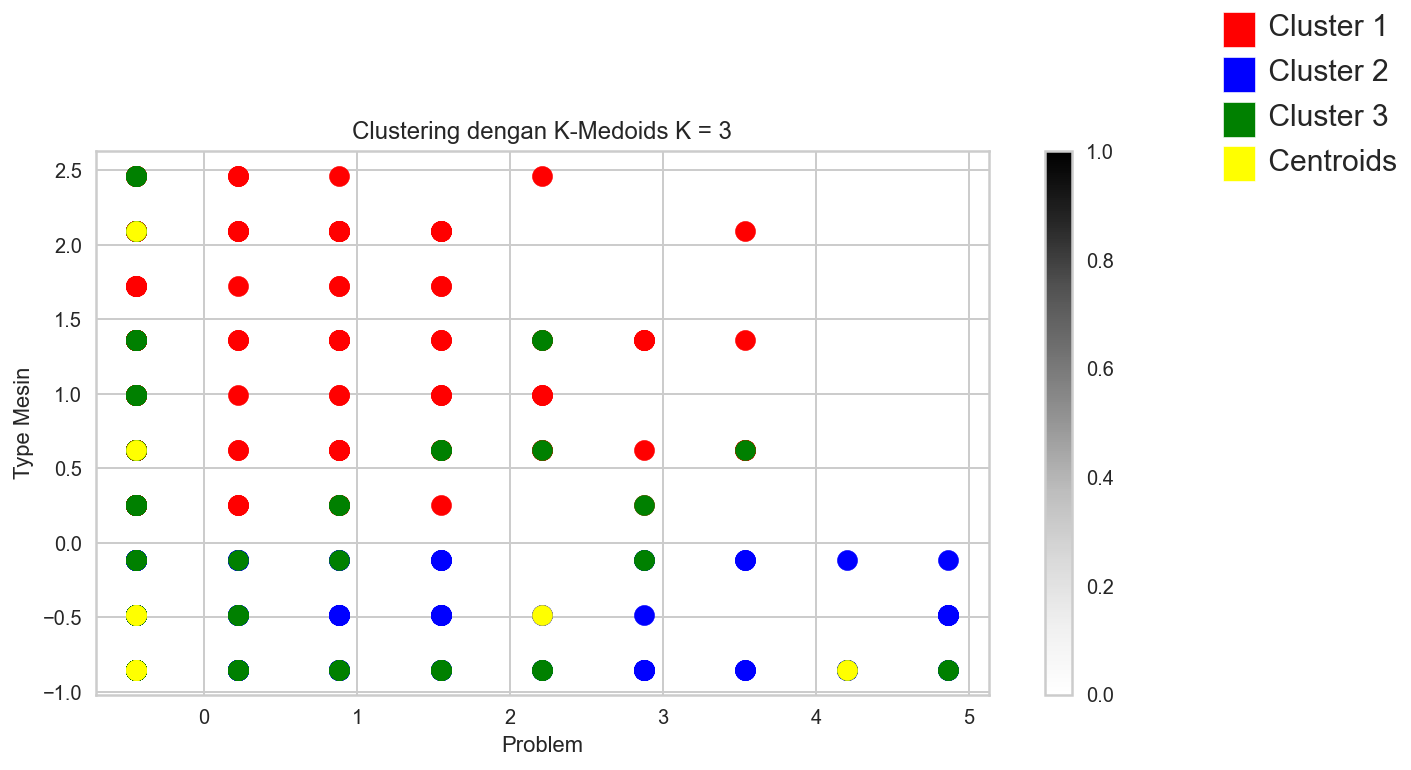

In [80]:
#VISUALISASI Algoritma Clustering K-MEANS pada nilai kemurnian Clustering K-MEDOIDS
plt.figure(figsize=[10, 5])
output = plt.scatter(X_scaled[y_kmed == 0, 0], X_scaled[y_kmed == 0, 1], s = 100, c = 'red')
output = plt.scatter(X_scaled[y_kmed == 1, 0], X_scaled[y_kmed == 1, 1], s = 100, c = 'blue')
output = plt.scatter(X_scaled[y_kmed == 2, 0], X_scaled[y_kmed == 2, 1], s = 100, c = 'green')
output = plt.scatter(kMedoids.cluster_centers_[:, 0], kMedoids.cluster_centers_[:,1], s = 100, c = 'yellow')

#Cluster 1
plt.text(6.7,3.4, '   ', bbox={'facecolor': 'red', 'pad': 3})
plt.text(6.9,3.4,' Cluster 1',style='normal',fontsize=15)
#Cluster 2
plt.text(6.7,3.1, '   ', bbox={'facecolor': 'blue', 'pad': 3})
plt.text(6.9,3.1,' Cluster 2',style='normal',fontsize=15)
#Cluster 3
plt.text(6.7,2.8, '   ', bbox={'facecolor': 'green', 'pad': 3})
plt.text(6.9,2.8,' Cluster 3',style='normal',fontsize=15)
#Cluster Centroids
plt.text(6.7,2.5, '   ', bbox={'facecolor': 'yellow', 'pad': 3})
plt.text(6.9,2.5,' Centroids',style='normal',fontsize=15)

plt.title('Clustering dengan K-Medoids K = 3')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.colorbar(output)
plt.show()

In [81]:
kmedoids = KMedoids(n_clusters = 4, init = 'k-medoids++', max_iter = 300, random_state = 0)
y_kmed = kmedoids.fit_predict(X_scaled)

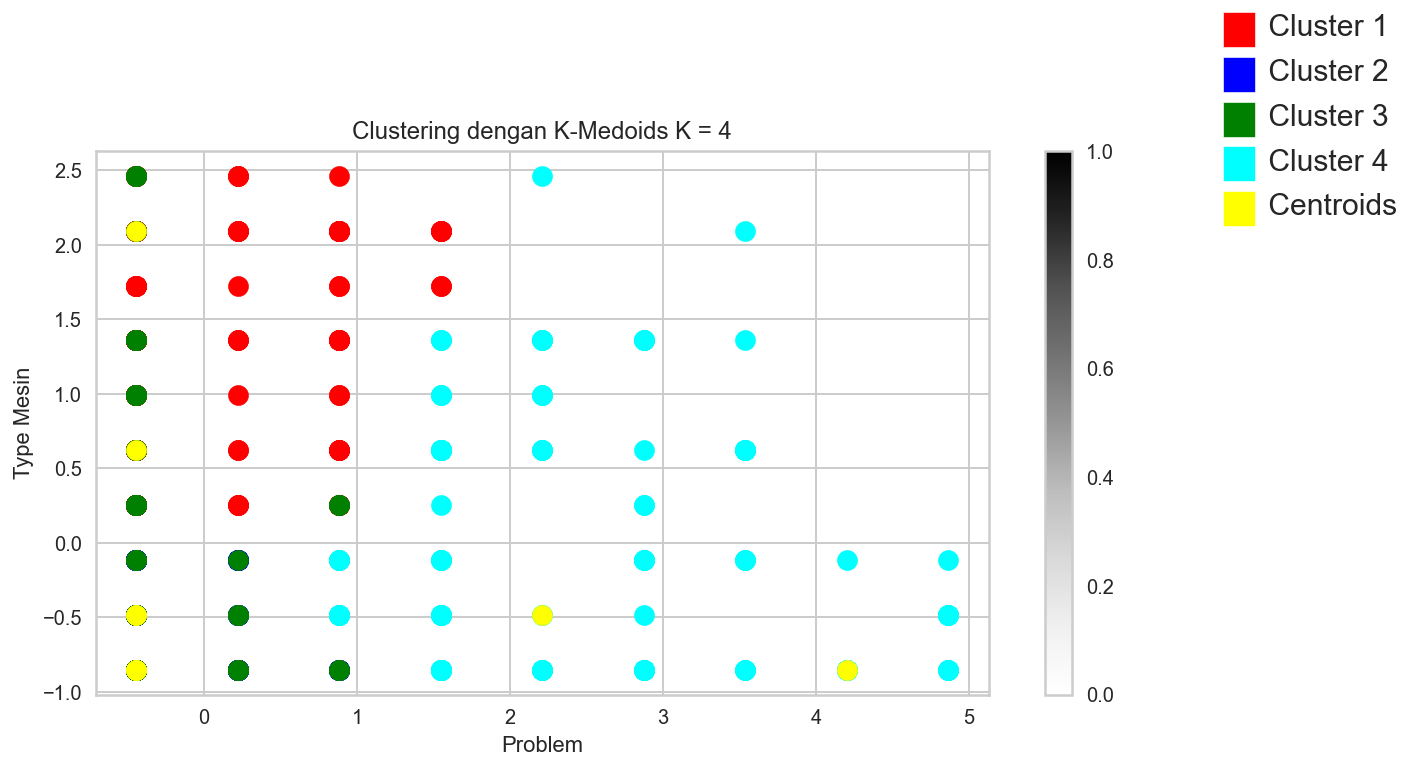

In [82]:
#VISUALISASI Algoritma Clustering K-MEANS pada nilai kemurnian Clustering K-MEDOIDS
plt.figure(figsize=[10, 5])
output = plt.scatter(X_scaled[y_kmed == 0, 0], X_scaled[y_kmed == 0, 1], s = 100, c = 'red')
output = plt.scatter(X_scaled[y_kmed == 1, 0], X_scaled[y_kmed == 1, 1], s = 100, c = 'blue')
output = plt.scatter(X_scaled[y_kmed == 2, 0], X_scaled[y_kmed == 2, 1], s = 100, c = 'green')
output = plt.scatter(X_scaled[y_kmed == 3, 0], X_scaled[y_kmed == 3, 1], s = 100, c = 'cyan')
output = plt.scatter(kMedoids.cluster_centers_[:, 0], kMedoids.cluster_centers_[:,1], s = 100, c = 'yellow')

#Cluster 1
plt.text(6.7,3.4, '   ', bbox={'facecolor': 'red', 'pad': 3})
plt.text(6.9,3.4,' Cluster 1',style='normal',fontsize=15)
#Cluster 2
plt.text(6.7,3.1, '   ', bbox={'facecolor': 'blue', 'pad': 3})
plt.text(6.9,3.1,' Cluster 2',style='normal',fontsize=15)
#Cluster 3
plt.text(6.7,2.8, '   ', bbox={'facecolor': 'green', 'pad': 3})
plt.text(6.9,2.8,' Cluster 3',style='normal',fontsize=15)
#Cluster 4
plt.text(6.7,2.5, '   ', bbox={'facecolor': 'cyan', 'pad': 3})
plt.text(6.9,2.5,' Cluster 4',style='normal',fontsize=15)
#Cluster Centroids
plt.text(6.7,2.2, '   ', bbox={'facecolor': 'yellow', 'pad': 3})
plt.text(6.9,2.2,' Centroids',style='normal',fontsize=15)

plt.title('Clustering dengan K-Medoids K = 4')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.colorbar(output)
plt.show()

In [83]:
kmedoids = KMedoids(n_clusters = 5, init = 'k-medoids++', max_iter = 300, random_state = 0)
y_kmed = kmedoids.fit_predict(X_scaled)

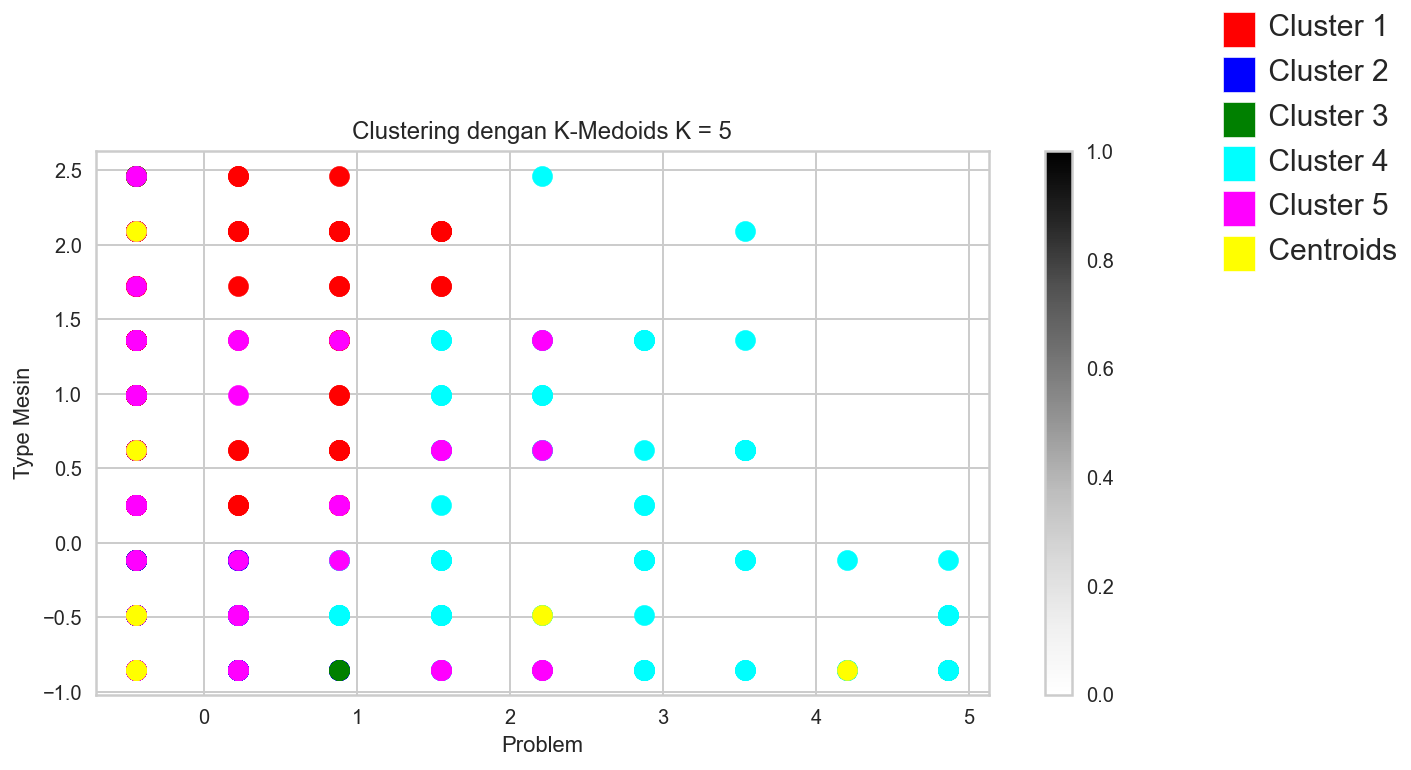

In [84]:
#VISUALISASI Algoritma Clustering K-MEANS pada nilai kemurnian Clustering K-MEDOIDS
plt.figure(figsize=[10, 5])
output = plt.scatter(X_scaled[y_kmed == 0, 0], X_scaled[y_kmed == 0, 1], s = 100, c = 'red')
output = plt.scatter(X_scaled[y_kmed == 1, 0], X_scaled[y_kmed == 1, 1], s = 100, c = 'blue')
output = plt.scatter(X_scaled[y_kmed == 2, 0], X_scaled[y_kmed == 2, 1], s = 100, c = 'green')
output = plt.scatter(X_scaled[y_kmed == 3, 0], X_scaled[y_kmed == 3, 1], s = 100, c = 'cyan')
output = plt.scatter(X_scaled[y_kmed == 4, 0], X_scaled[y_kmed == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
output = plt.scatter(kMedoids.cluster_centers_[:, 0], kMedoids.cluster_centers_[:,1], s = 100, c = 'yellow')

#Cluster 1
plt.text(6.7,3.4, '   ', bbox={'facecolor': 'red', 'pad': 3})
plt.text(6.9,3.4,' Cluster 1',style='normal',fontsize=15)
#Cluster 2
plt.text(6.7,3.1, '   ', bbox={'facecolor': 'blue', 'pad': 3})
plt.text(6.9,3.1,' Cluster 2',style='normal',fontsize=15)
#Cluster 3
plt.text(6.7,2.8, '   ', bbox={'facecolor': 'green', 'pad': 3})
plt.text(6.9,2.8,' Cluster 3',style='normal',fontsize=15)
#Cluster 4
plt.text(6.7,2.5, '   ', bbox={'facecolor': 'cyan', 'pad': 3})
plt.text(6.9,2.5,' Cluster 4',style='normal',fontsize=15)
#Cluster 5
plt.text(6.7,2.2, '   ', bbox={'facecolor': 'magenta', 'pad': 3})
plt.text(6.9,2.2,' Cluster 5',style='normal',fontsize=15)
#Cluster Centroids
plt.text(6.7,1.9, '   ', bbox={'facecolor': 'yellow', 'pad': 3})
plt.text(6.9,1.9,' Centroids',style='normal',fontsize=15)

plt.title('Clustering dengan K-Medoids K = 5')
plt.xlabel('Problem')
plt.ylabel('Type Mesin')
plt.colorbar(output)
plt.show()

In [85]:
# Nilai Kemurnian K-Means with Outlier
from sklearn import metrics
def purity_score(y_true, y_pred):
    # Menghitung matriks kontingensi (juga disebut matriks kebingungan)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # Kembalikan Nilai Kemurnian 
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
purity_score(X,Y)

0.5919753086419753

In [86]:
## Nilai Kemurnian K-Medoids with Outlier
purity_score(Y, X)

0.6459876543209877

In [87]:
## Membuat Visualisasi Nilai Silhouette dan Nilai Kemurnian dengan Outlier
data = [['Silhoutte Score K-Means', 0.606], ['K-Means with Outliers', 0.524], ['Silhoutte Score K-Medoids', 0.240],['K-Medoids with outliers', 0.645]] 
data = pd.DataFrame(data, columns = ['Metode', 'Nilai Kemurnian Algoritma With Outlier']) 

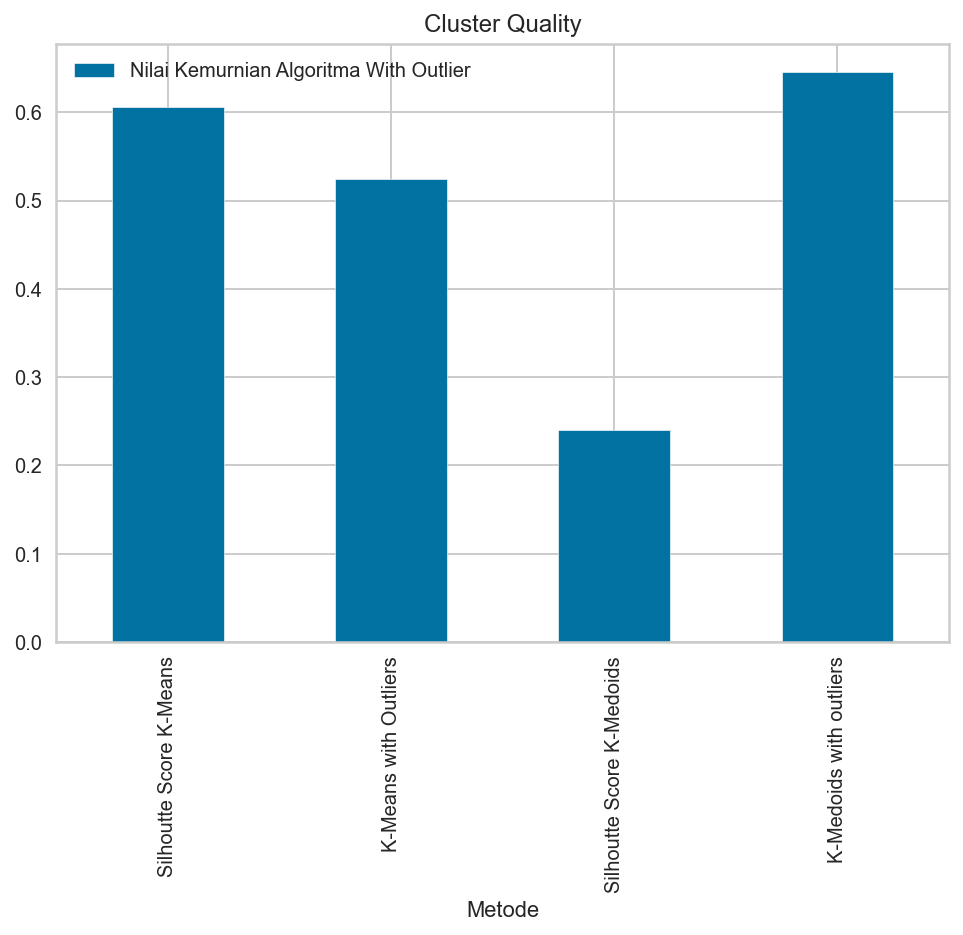

In [88]:
data.plot.bar(x='Metode',y='Nilai Kemurnian Algoritma With Outlier',title='Cluster Quality')